# Cloning dataset

In [1]:
# This is our GitHub repository, all datasets are included in this repo
!git clone https://github.com/Alvin-Tan-Yi-Tung/Animal_Disease_Prediction.git

Cloning into 'Animal_Disease_Prediction'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 85 (delta 31), reused 70 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 6.94 MiB | 6.08 MiB/s, done.
Resolving deltas: 100% (31/31), done.


# Data Preparation

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Animal_Disease_Prediction/backend/wahis_outbreak_details.csv")
df

country                location                    lat_long  \
0      Armenia              Sardarapat           40.1239 , 44.0044   
1      Armenia                Aygeshat            40.227 , 44.2855   
2      Namibia        Walvisbay Lagoon        -22.96348 , 14.48727   
3     Thailand               Si Sa Ket      14.951072 , 104.331852   
4     Thailand       Nakhon Ratchasima      15.552079 , 102.777379   
...        ...                     ...                         ...   
2195    France       FONTENAY LE COMTE   46.45964911 , -0.78859276   
2196   Ecuador  San Juan de Bellavista  -3.41489966 , -79.35188579   
2197   Ecuador          Quebrada Honda  -3.40597651 , -79.35171856   
2198   Ecuador              San Carlos  -0.19417301 , -76.51244951   
2199   Ecuador           García Moreno  -0.29393707 , -77.00239593   

      start_date    end_date cases deaths  
0     2025/08/04  2025/08/05     1      1  
1     2025/07/29  2025/07/30     1      1  
2     2025/06/16           -     -      1  
3     2025/06/30           -     1      1  
4     2025/06/23           -     1      1  
...          ...         ...   ...    ...  
2195  2007/11/23  2007/11/29     1      1  
2196  2007/03/12  2007/06/01     1      1  
2197  2007/02/20  2007/06/01     1      1  
2198  2007/03/06  2007/08/17     1      1  
2199  2007/02/24  2007/08/17     6      6  

[2200 rows x 7 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     2200 non-null   object
 1   location    2200 non-null   object
 2   lat_long    2200 non-null   object
 3   start_date  2200 non-null   object
 4   end_date    2200 non-null   object
 5   cases       2200 non-null   object
 6   deaths      2200 non-null   object
dtypes: object(7)
memory usage: 120.4+ KB


# Data Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert dates (string dates to datetime objects & missing end dates become NaT)
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Handle ongoing outbreaks (to indicate whether the outbreak is still active or not)
df['is_ongoing'] = df['end_date'].isna()

# Calculate the duration of on-going outbreak (output is integer days)
df['duration'] = (df['end_date'].fillna(pd.Timestamp.today()) - df['start_date']).dt.days

# Extract location features (split into two float columns)
df[['latitude', 'longitude']] = df['lat_long'].str.split(',', expand=True).astype(float)

# Convert cases and deaths to numeric
df['cases'] = pd.to_numeric(df['cases'], errors='coerce')
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce')

# Fill the "-" with 0
df['cases'] = df['cases'].fillna(0)
df['deaths'] = df['deaths'].fillna(0)

# Feature engineering
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month
df['week'] = df['start_date'].dt.isocalendar().week

# Country encoding
country_encoder = LabelEncoder()
df['country_code'] = country_encoder.fit_transform(df['country'])

print(df.head().to_string())

    country           location                lat_long start_date   end_date  cases  deaths  is_ongoing  duration   latitude   longitude  year  month  week  country_code
0   Armenia         Sardarapat       40.1239 , 44.0044 2025-08-04 2025-08-05    1.0     1.0       False         1  40.123900   44.004400  2025      8    32             2
1   Armenia           Aygeshat        40.227 , 44.2855 2025-07-29 2025-07-30    1.0     1.0       False         1  40.227000   44.285500  2025      7    31             2
2   Namibia   Walvisbay Lagoon    -22.96348 , 14.48727 2025-06-16        NaT    0.0     1.0        True        70 -22.963480   14.487270  2025      6    25            34
3  Thailand          Si Sa Ket  14.951072 , 104.331852 2025-06-30        NaT    1.0     1.0        True        56  14.951072  104.331852  2025      6    27            44
4  Thailand  Nakhon Ratchasima  15.552079 , 102.777379 2025-06-23        NaT    1.0     1.0        True        63  15.552079  102.777379  2025      6 

In [5]:
# View the data types of columns (after preprocessing)
print(df.dtypes)

country                 object
location                object
lat_long                object
start_date      datetime64[ns]
end_date        datetime64[ns]
cases                  float64
deaths                 float64
is_ongoing                bool
duration                 int64
latitude               float64
longitude              float64
year                     int32
month                    int32
week                    UInt32
country_code             int64
dtype: object


In [6]:
# View missing values for each column
print(df.isna().sum())

country           0
location          0
lat_long          0
start_date        0
end_date        336
cases             0
deaths            0
is_ongoing        0
duration          0
latitude          0
longitude         0
year              0
month             0
week              0
country_code      0
dtype: int64


In [7]:
# View the encoder of country
print(f"Encoded {len(country_encoder.classes_)} countries:")
print(country_encoder.classes_[:])

Encoded 48 countries:
['Albania' 'Argentina' 'Armenia' 'Bangladesh' 'Belgium' 'Bhutan'
 'Bosnia and Herzegovina' 'Burkina Faso' 'Cambodia' 'Canada' 'Ceuta'
 'Chile' 'Chinese Taipei' 'Congo (Rep. of the)' 'Ecuador' 'Egypt'
 'El Salvador' 'Finland' 'France' 'French Guiana' 'Germany' 'Greece'
 'Honduras' 'Hungary' 'Indonesia' 'Italy' 'Kazakhstan' 'Liberia' 'Libya'
 'Lithuania' 'Malaysia' 'Melilla' 'Moldova' 'Myanmar' 'Namibia'
 'Netherlands' 'Nigeria' 'North Macedonia' 'Norway' 'Palestine' 'Slovakia'
 'South Africa' 'Spain' 'Sweden' 'Thailand' 'Timor-Leste'
 'United States of America' 'Uruguay']


# Create Country-Time Aggregated Dataset

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def preprocess_data(df, country, start_date, interval="weekly", lookback=12, target_col="outbreak_count"):
    """
    Preprocess data for LSTM model with user-selected country, interval, and start date.
    Uses create_country_time_series for consistent aggregation.

    Parameters:
    - df: raw outbreak dataframe with columns ["start_date","end_date","country","cases","deaths",...]
    - country: country name (string, must exist in df["country"])
    - start_date: string or pd.Timestamp (first date to keep for training/prediction)
    - interval: "weekly", "monthly", "annual"
    - lookback: number of time steps in each input sequence
    - target_col: which column to predict (default="outbreak_count")

    Returns:
    - X: input sequences for LSTM, shape (samples, lookback, features=1)
    - y: target values
    - scaler: fitted MinMaxScaler for inverse transform
    - dates: corresponding dates for each y
    """

    # === 1. Map user interval to pandas frequency ===
    freq_map = {"weekly": "W", "monthly": "M", "annual": "A"}
    if interval not in freq_map:
        raise ValueError("interval must be one of: 'weekly','monthly','annual'")
    frequency = freq_map[interval]

    # === 2. Build aggregated time series ===
    ts = create_country_time_series(df, frequency)

    # === 3. Filter by country and start date ===
    ts = ts[ts["country"] == country].copy()
    ts = ts[ts["start_date"] >= pd.to_datetime(start_date)]

    if ts.empty:
        raise ValueError(f"No data available for {country} after {start_date} at {interval} frequency.")

    # === 4. Scale target column ===
    scaler = MinMaxScaler()
    scaled_values = scaler.fit_transform(ts[[target_col]])

    # === 5. Create supervised sequences ===
    X, y, dates = [], [], []
    for i in range(len(scaled_values) - lookback):
        X.append(scaled_values[i : i + lookback])
        y.append(scaled_values[i + lookback])
        dates.append(ts["start_date"].iloc[i + lookback])

    X, y = np.array(X), np.array(y)

    return X, y, scaler, dates


# --- Helper function from before ---
def create_country_time_series(df, frequency):
    """Aggregate outbreak data into regular time series grouped by country & frequency"""
    df = df.copy()
    df["start_date"] = pd.to_datetime(df["start_date"])
    df = df.set_index("start_date")

    agg_dict = {
        "cases": "sum",
        "deaths": "sum",
        "duration": "mean",
        "latitude": "first",
        "longitude": "first",
        "is_ongoing": "sum",
        "country_code": "first",
        "end_date": "first",
    }

    grouped = df.groupby(["country", pd.Grouper(freq=frequency)])
    time_series = grouped.agg(agg_dict)
    time_series["outbreak_count"] = grouped.size()

    time_series = time_series.reset_index().sort_values(["country", "start_date"])

    # Fill gaps with complete country-date index
    full_range = pd.date_range(time_series["start_date"].min(), time_series["start_date"].max(), freq=frequency)
    countries = time_series["country"].unique()
    full_index = pd.MultiIndex.from_product([countries, full_range], names=["country", "start_date"])
    time_series = time_series.set_index(["country", "start_date"]).reindex(full_index).reset_index()

    # Fill missing values
    time_series["outbreak_count"] = time_series["outbreak_count"].fillna(0)
    time_series["cases"] = time_series["cases"].fillna(0)
    time_series["deaths"] = time_series["deaths"].fillna(0)
    time_series["duration"] = time_series.groupby("country")["duration"].transform(lambda x: x.fillna(x.mean()))
    time_series["duration"] = time_series["duration"].fillna(0)
    for col in ["latitude", "longitude"]:
        time_series[col] = time_series.groupby("country")[col].transform(lambda x: x.fillna(x.mean()))

    # Map country codes back
    country_code_mapping = df.reset_index().drop_duplicates("country").set_index("country")["country_code"]
    time_series["country_code"] = time_series["country"].map(country_code_mapping)

    # Handle end_date + ongoing flag
    time_series.loc[time_series["outbreak_count"] == 0, "end_date"] = time_series["start_date"]
    time_series["is_ongoing"] = time_series["end_date"].isna().astype(int)

    # Add temporal features
    time_series["year"] = time_series["start_date"].dt.year
    time_series["month"] = time_series["start_date"].dt.month
    time_series["week_of_year"] = time_series["start_date"].dt.isocalendar().week.astype(int)

    return time_series


In [ ]:
# Show first 10 rows of the weekly time series
print(weekly_series.head(10).to_string(), "\n")  # .to_string() prevents truncation

print(monthly_series.head(10).to_string(), "\n")

print(yearly_series.head(10).to_string())


   country start_date  cases  deaths  duration  latitude  longitude  is_ongoing  country_code   end_date  outbreak_count  year  month  week_of_year
0  Albania 2007-02-25    0.0     0.0       0.0    42.008    20.3105       False             0 2007-02-25             0.0  2007      2             8
1  Albania 2007-03-04    0.0     0.0       0.0    42.008    20.3105       False             0 2007-03-04             0.0  2007      3             9
2  Albania 2007-03-11    0.0     0.0       0.0    42.008    20.3105       False             0 2007-03-11             0.0  2007      3            10
3  Albania 2007-03-18    0.0     0.0       0.0    42.008    20.3105       False             0 2007-03-18             0.0  2007      3            11
4  Albania 2007-03-25    0.0     0.0       0.0    42.008    20.3105       False             0 2007-03-25             0.0  2007      3            12
5  Albania 2007-04-01    0.0     0.0       0.0    42.008    20.3105       False             0 2007-04-01        

In [ ]:
# View missing values for each column
print(weekly_series.isna().sum(), '\n')
print(monthly_series.isna().sum(), '\n')
print(yearly_series.isna().sum())

country             0
start_date          0
cases               0
deaths              0
duration            0
latitude            0
longitude           0
is_ongoing          0
country_code        0
end_date          102
outbreak_count      0
year                0
month               0
week_of_year        0
dtype: int64 

country            0
start_date         0
cases              0
deaths             0
duration           0
latitude           0
longitude          0
is_ongoing         0
country_code       0
end_date          43
outbreak_count     0
year               0
month              0
week_of_year       0
dtype: int64 

country            0
start_date         0
cases              0
deaths             0
duration           0
latitude           0
longitude          0
is_ongoing         0
country_code       0
end_date          11
outbreak_count     0
year               0
month              0
week_of_year       0
dtype: int64


In [ ]:
print("Weekly series with NaT end_date:")
print(weekly_series[weekly_series['end_date'].isna()].to_string(), '\n')

print("Monthly series with NaT end_date:")
print(monthly_series[monthly_series['end_date'].isna()].to_string(), '\n')

print("Yearly series with NaT end_date:")
print(yearly_series[yearly_series['end_date'].isna()].to_string())

Weekly series with NaT end_date:
           country start_date  cases  deaths     duration   latitude   longitude  is_ongoing  country_code end_date  outbreak_count  year  month  week_of_year
23228    Indonesia 2008-11-30    3.0     3.0  6114.666667  -8.757800  115.169960        True            24      NaT             3.0  2008     11            48
23229    Indonesia 2008-12-07    8.0     8.0  6107.333333  -8.771100  115.170760        True            24      NaT             3.0  2008     12            49
23231    Indonesia 2008-12-21    8.0     8.0  6093.571429  -8.582000  115.169000        True            24      NaT             7.0  2008     12            51
23233    Indonesia 2009-01-04    1.0     1.0  6076.000000  -8.719600  115.170340        True            24      NaT             1.0  2009      1             1
23236    Indonesia 2009-01-25    1.0     1.0  6061.000000  -8.725000  115.233000        True            24      NaT             1.0  2009      1             4
23268    Indo

In [ ]:
# Remove rows with NaT in 'end_date' from weekly, monthly, and yearly series
weekly_series_cleaned = weekly_series.dropna(subset=['end_date']).copy()
monthly_series_cleaned = monthly_series.dropna(subset=['end_date']).copy()
yearly_series_cleaned = yearly_series.dropna(subset=['end_date']).copy()

print("Shape of dataframes after removing rows with NaT end_date:")
print(f"Weekly series: {weekly_series_cleaned.shape}")
print(f"Monthly series: {monthly_series_cleaned.shape}")
print(f"Yearly series: {yearly_series_cleaned.shape}")

Shape of dataframes after removing rows with NaT end_date:
Weekly series: (46170, 14)
Monthly series: (10661, 14)
Yearly series: (901, 14)


# Malaysia outbreak trends

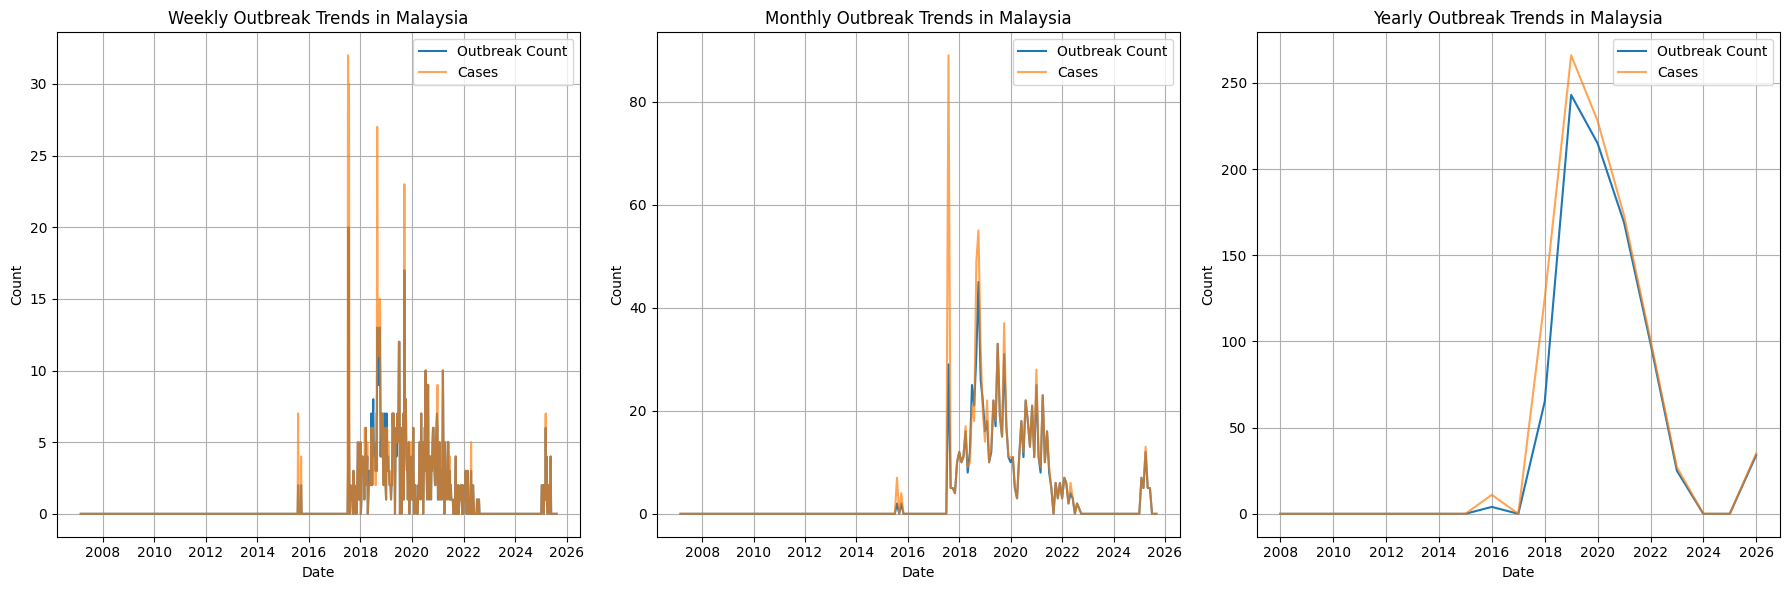

In [ ]:
import matplotlib.pyplot as plt

# Plot outbreak trends for a country
country = 'Malaysia'
weekly_data = weekly_series[weekly_series['country'] == country]
monthly_data = monthly_series[monthly_series['country'] == country]
yearly_data = yearly_series[yearly_series['country'] == country]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Weekly plot
axes[0].plot(weekly_data['start_date'], weekly_data['outbreak_count'], label='Outbreak Count')
axes[0].plot(weekly_data['start_date'], weekly_data['cases'], label='Cases', alpha=0.7)
axes[0].set_title(f'Weekly Outbreak Trends in {country}')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Count')
axes[0].legend()
axes[0].grid(True)

# Monthly plot
axes[1].plot(monthly_data['start_date'], monthly_data['outbreak_count'], label='Outbreak Count')
axes[1].plot(monthly_data['start_date'], monthly_data['cases'], label='Cases', alpha=0.7)
axes[1].set_title(f'Monthly Outbreak Trends in {country}')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Count')
axes[1].legend()
axes[1].grid(True)

# Yearly plot
axes[2].plot(yearly_data['start_date'], yearly_data['outbreak_count'], label='Outbreak Count')
axes[2].plot(yearly_data['start_date'], yearly_data['cases'], label='Cases', alpha=0.7)
axes[2].set_title(f'Yearly Outbreak Trends in {country}')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Count')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Total weekly outbreak counts for each country

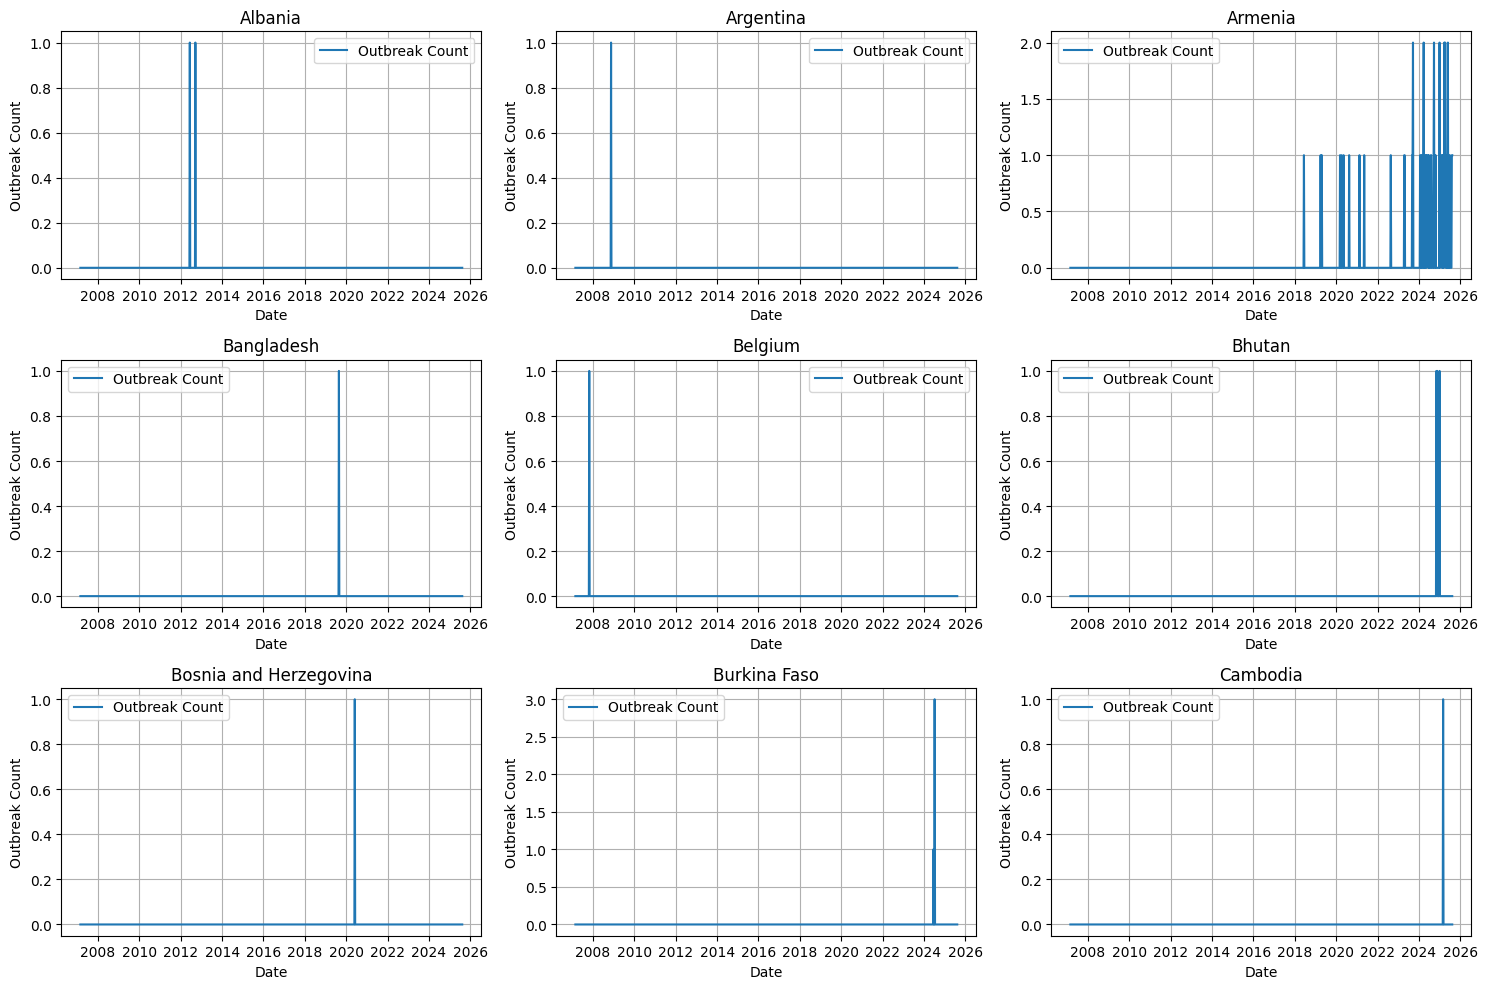

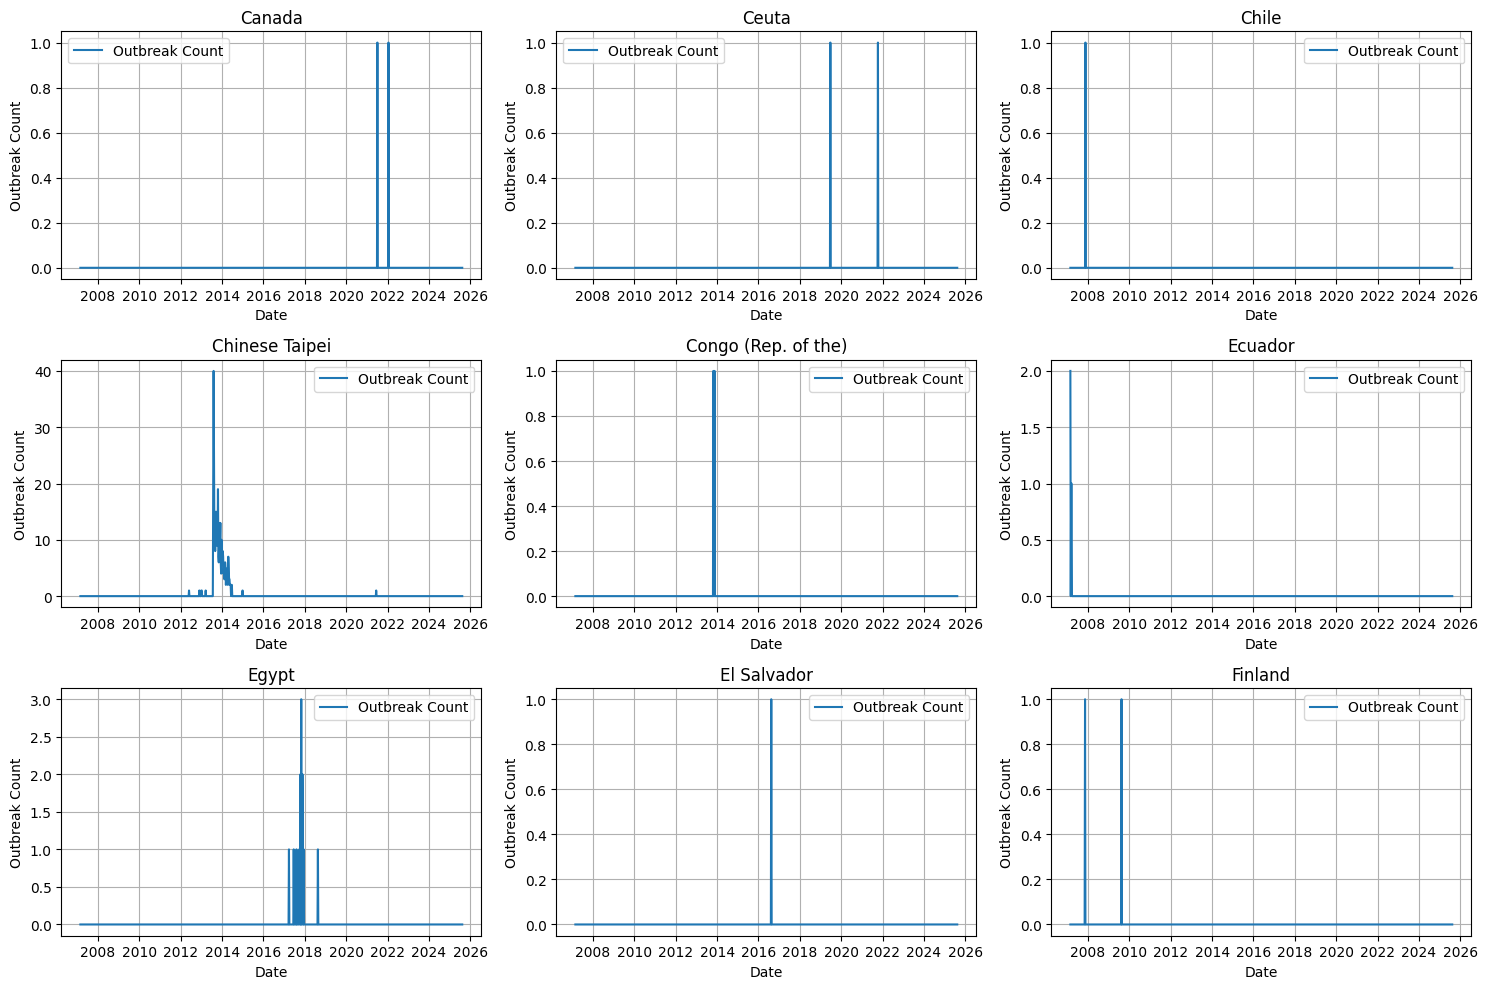

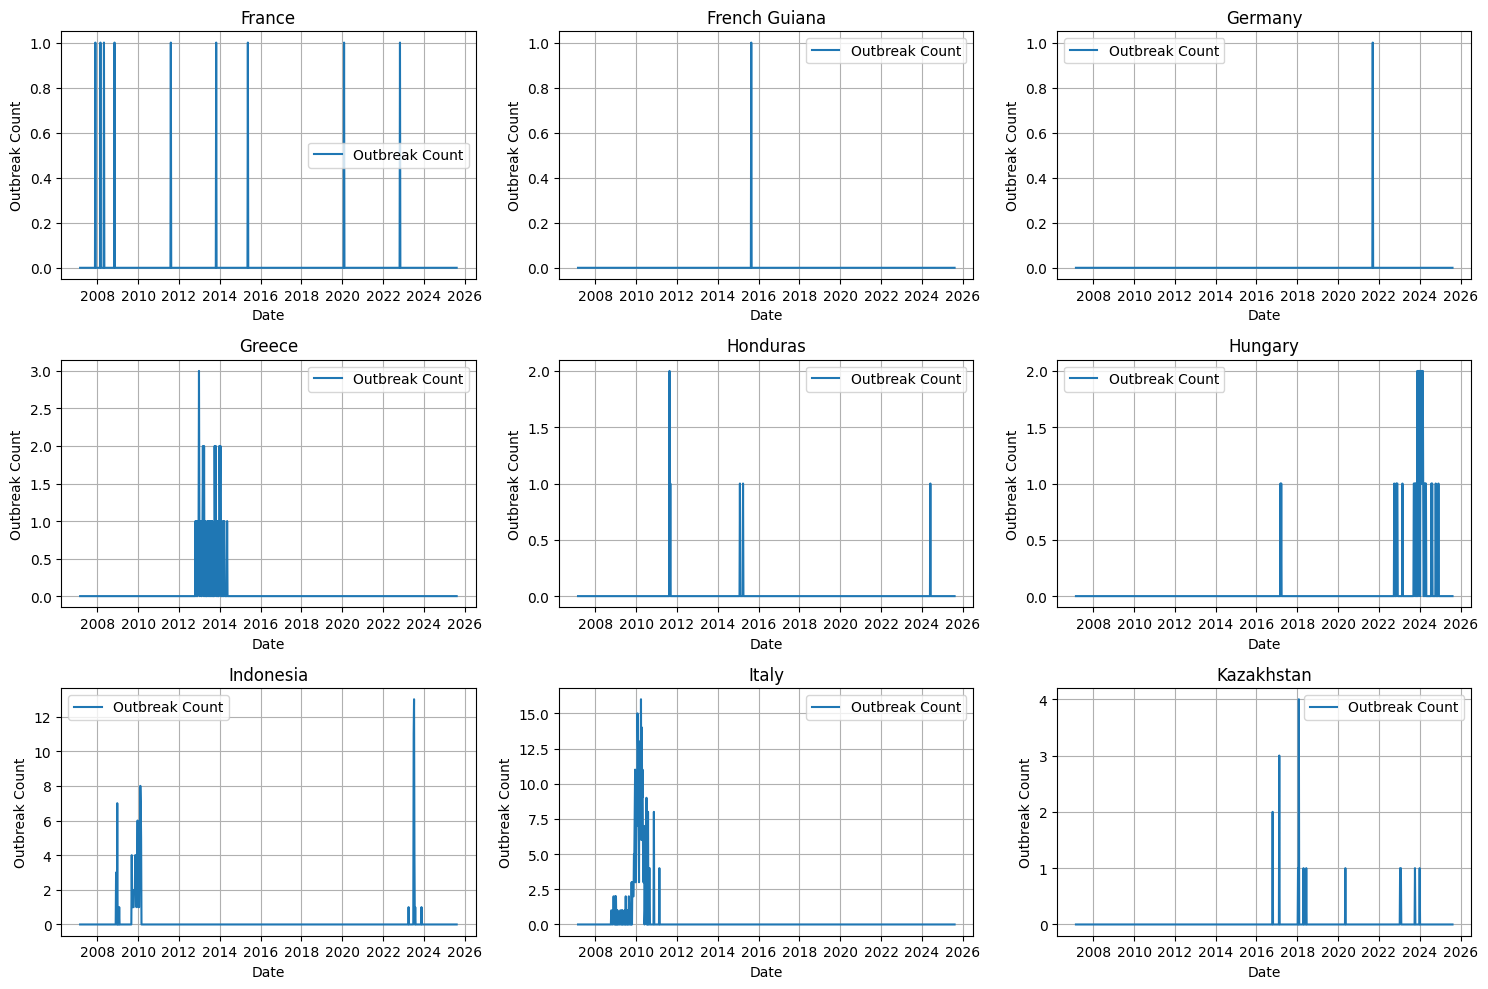

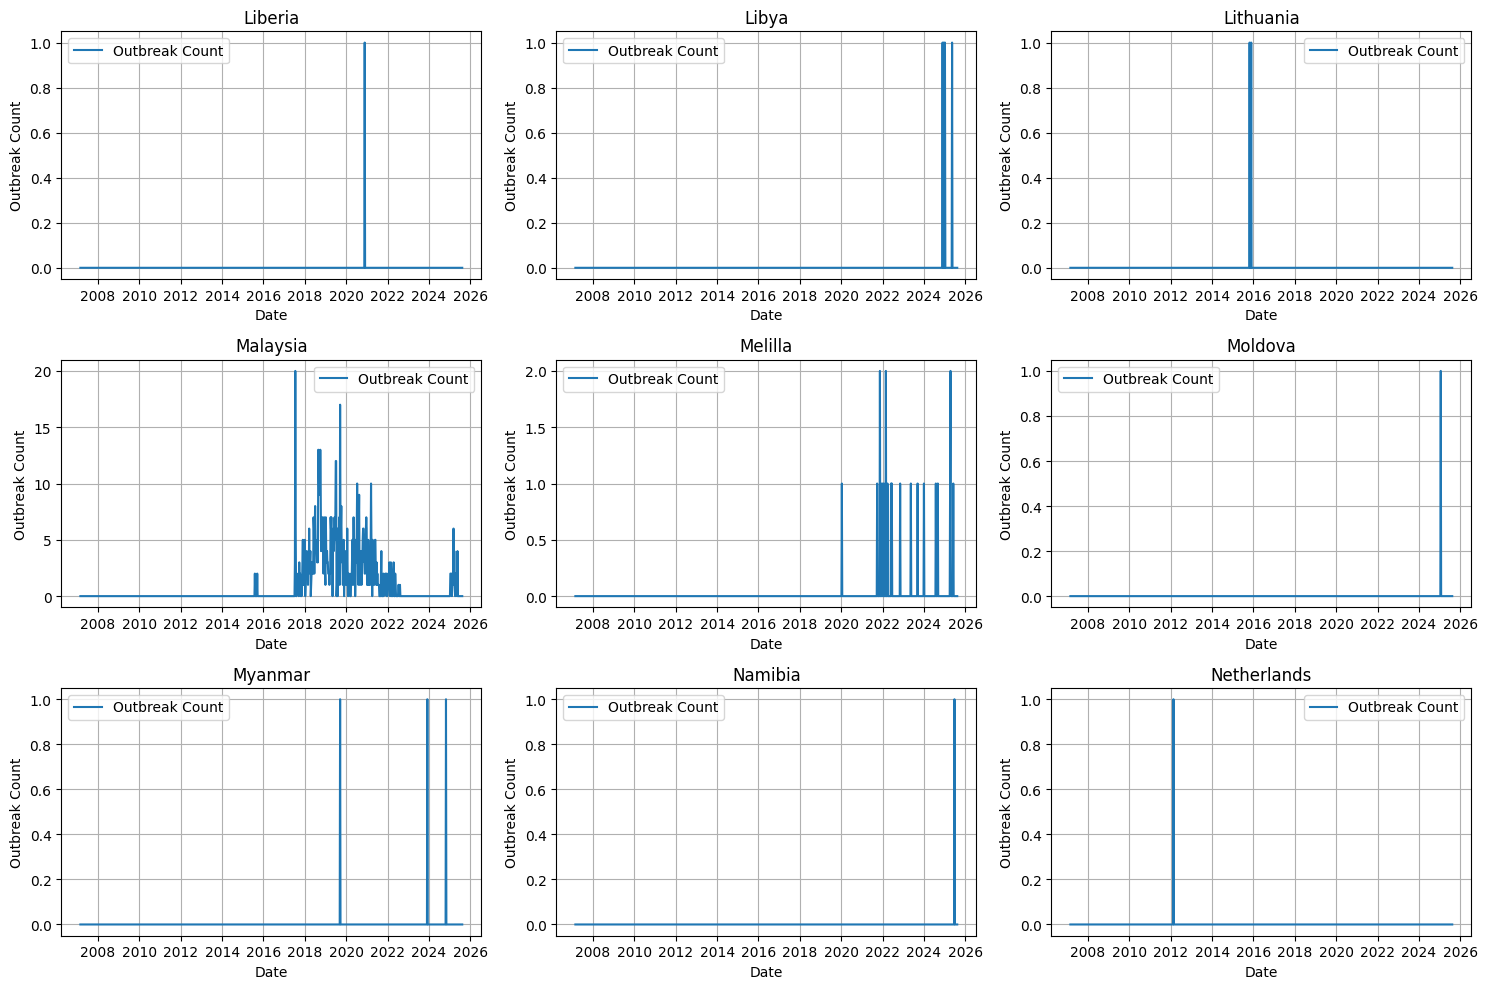

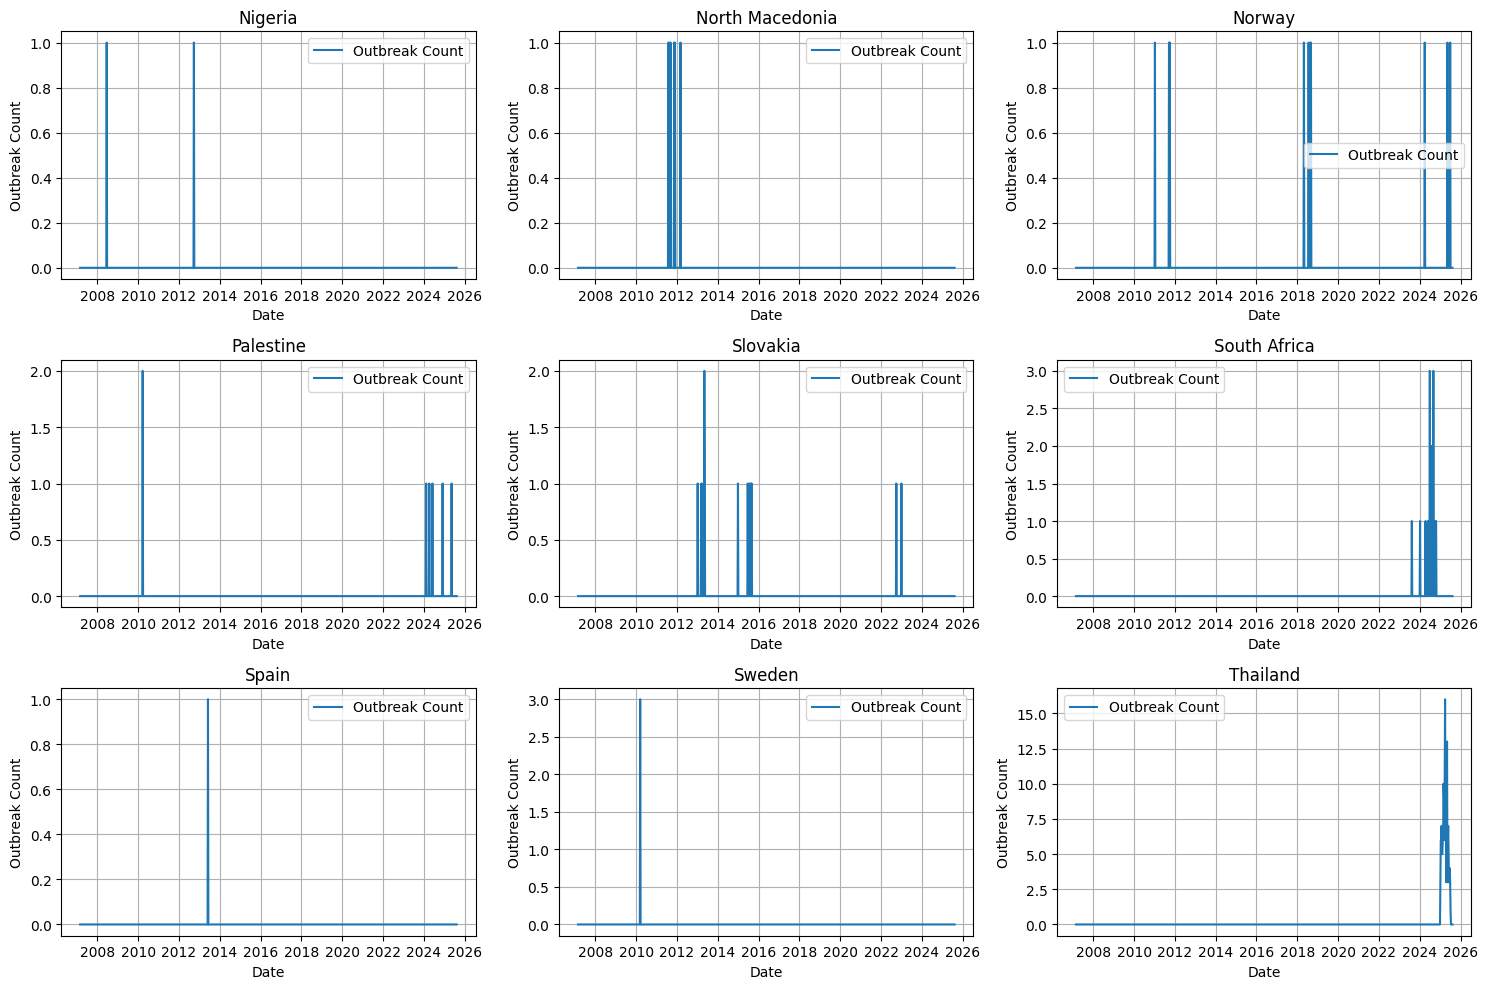

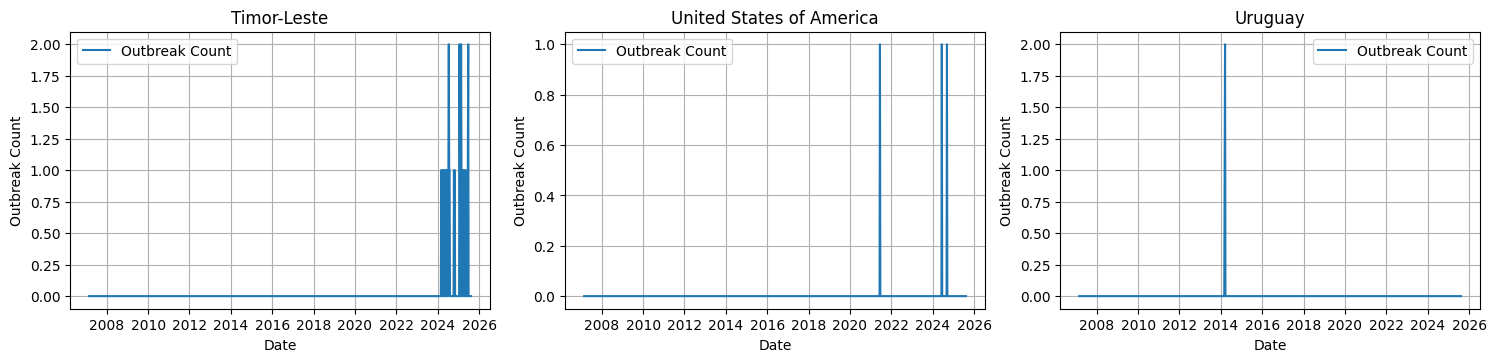

In [ ]:
import matplotlib.pyplot as plt

# Get the list of unique countries
countries = weekly_series['country'].unique()

# Plot outbreak trends for each country in subplots
n_cols = 3
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, country in enumerate(countries):
    # Create a new figure every 4 countries
    if i > 0 and i % (n_cols * n_rows) == 0:
        plt.tight_layout()
        plt.show()
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
        axes = axes.flatten()

    country_data = weekly_series[weekly_series['country'] == country]

    ax = axes[i % (n_cols * n_rows)] # Get the current subplot
    ax.plot(country_data['start_date'], country_data['outbreak_count'], label='Outbreak Count')
    ax.set_title(f'{country}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Outbreak Count')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i % (n_cols * n_rows) + 1, n_cols * n_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Total monthly oubtreak counts for each country

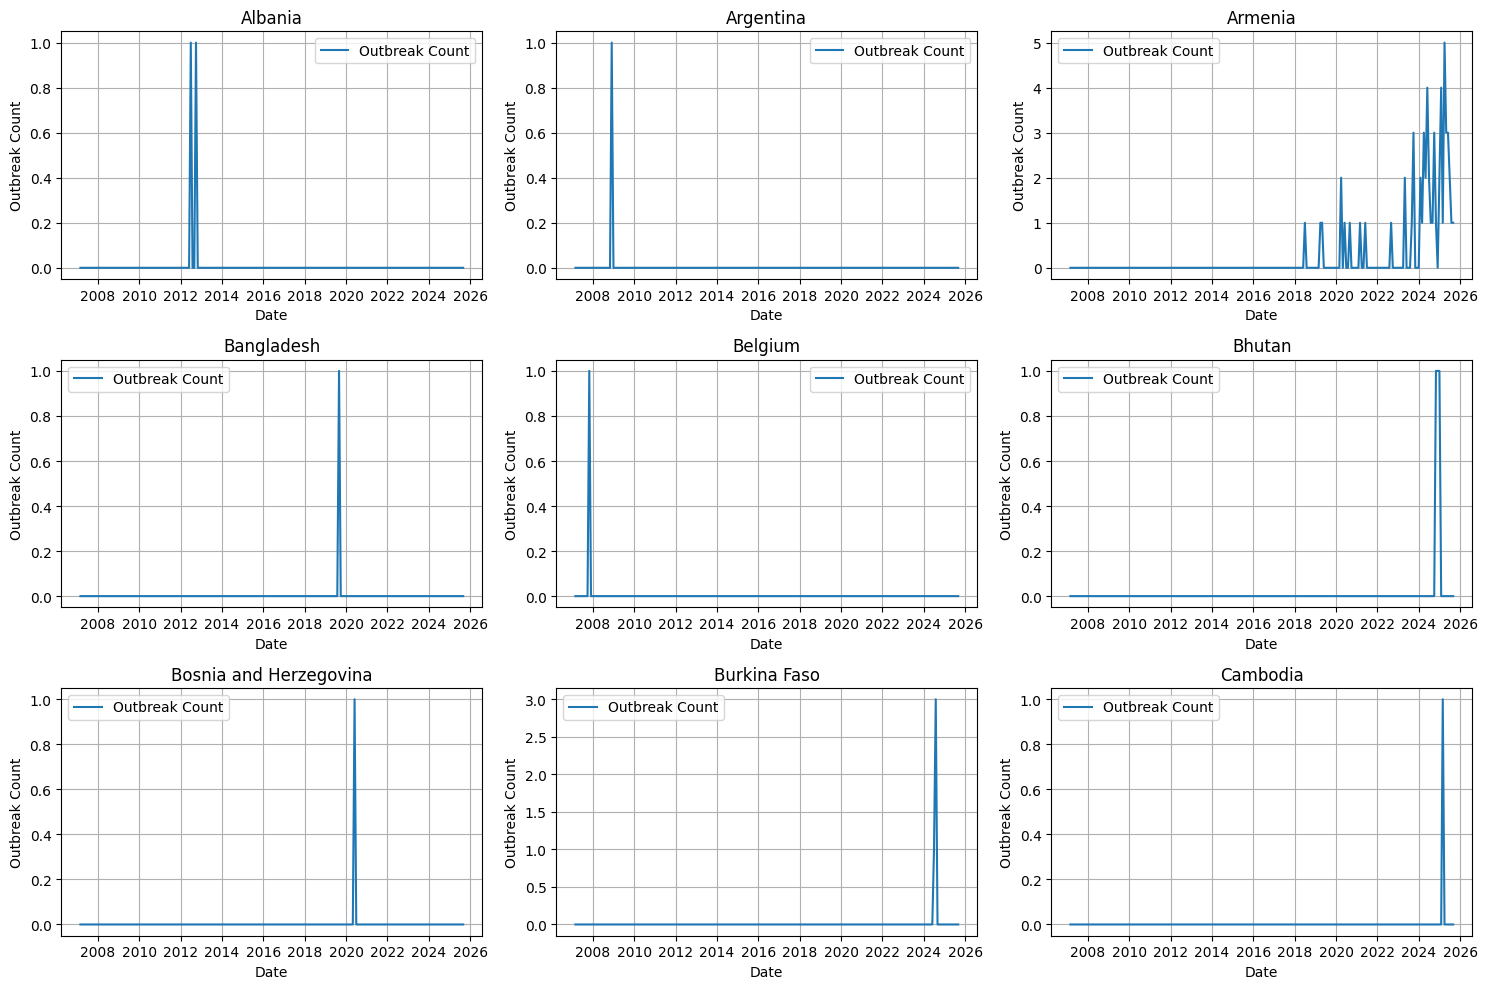

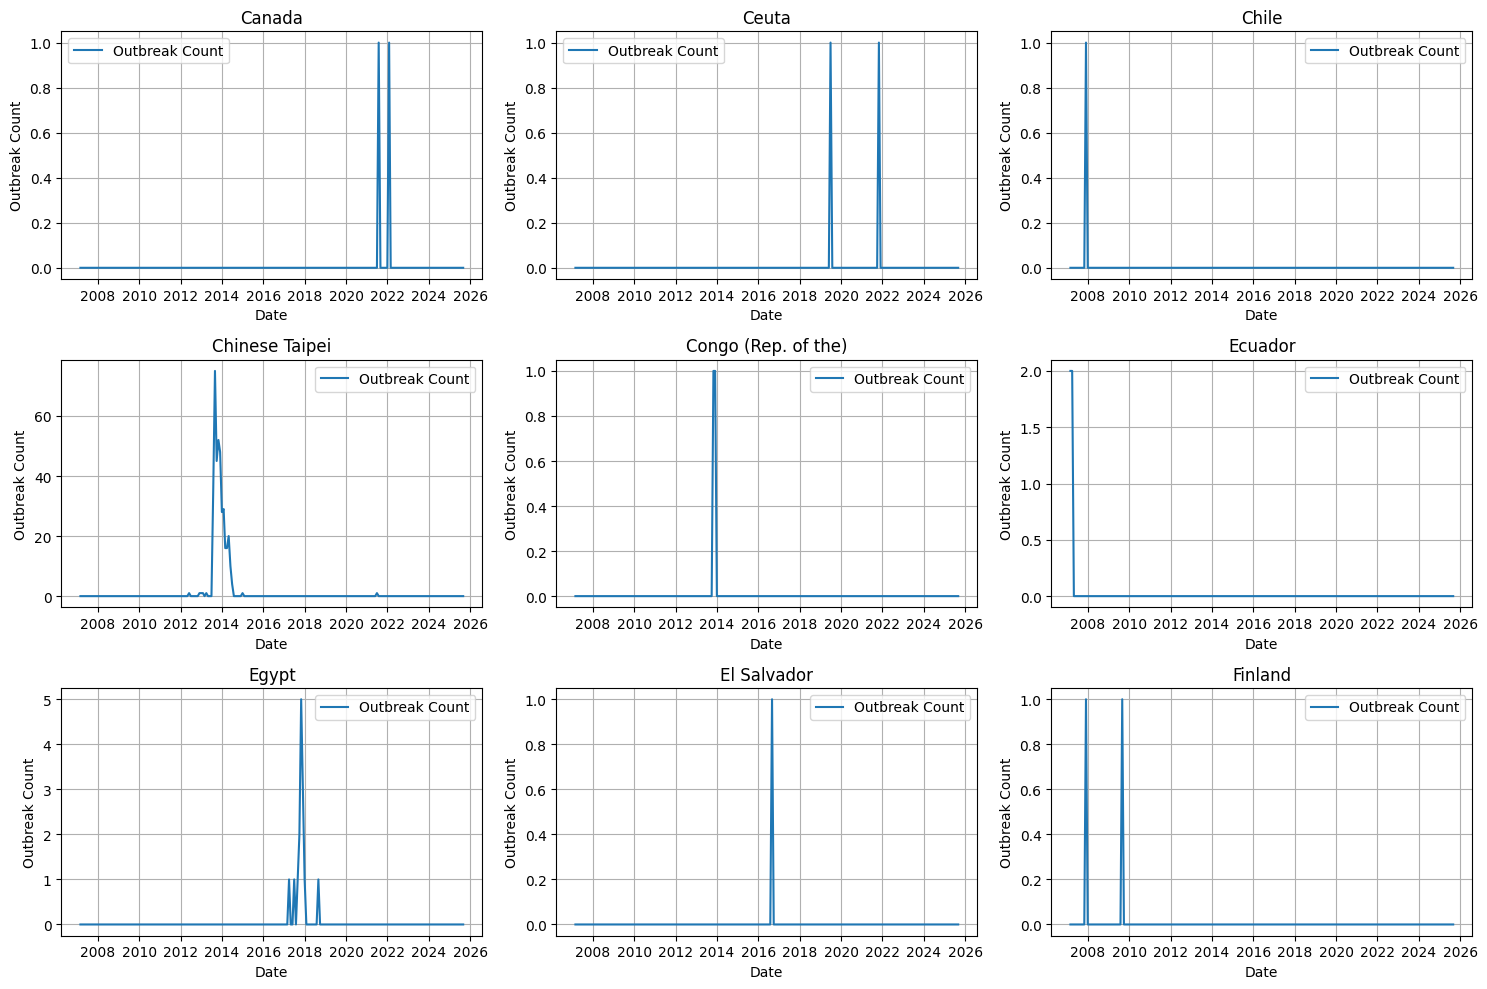

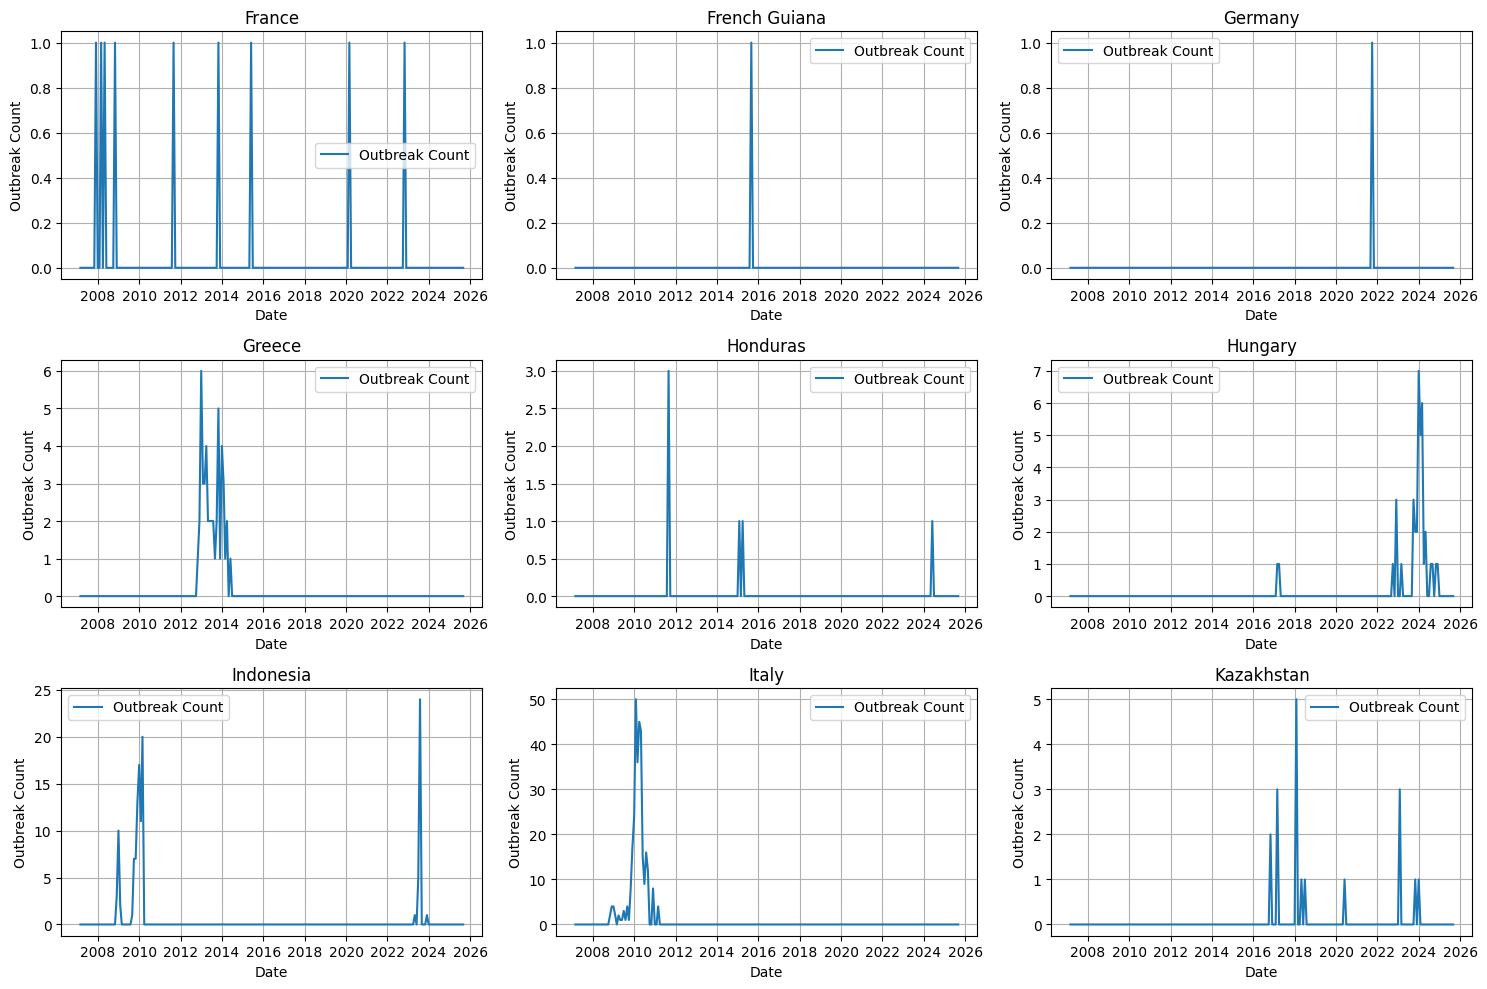

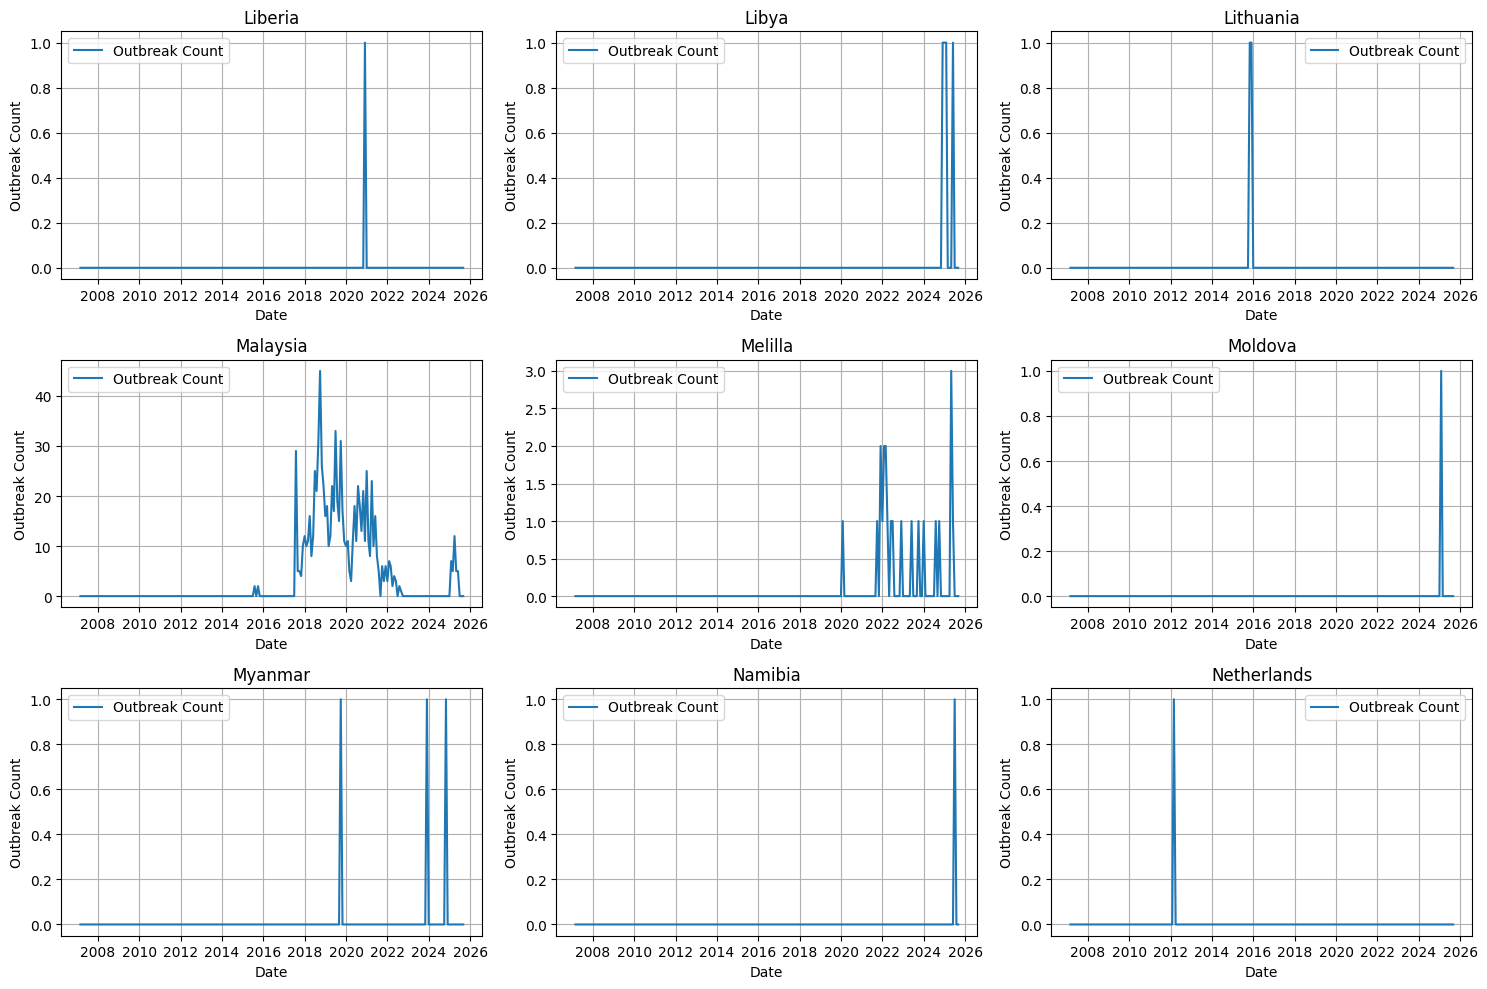

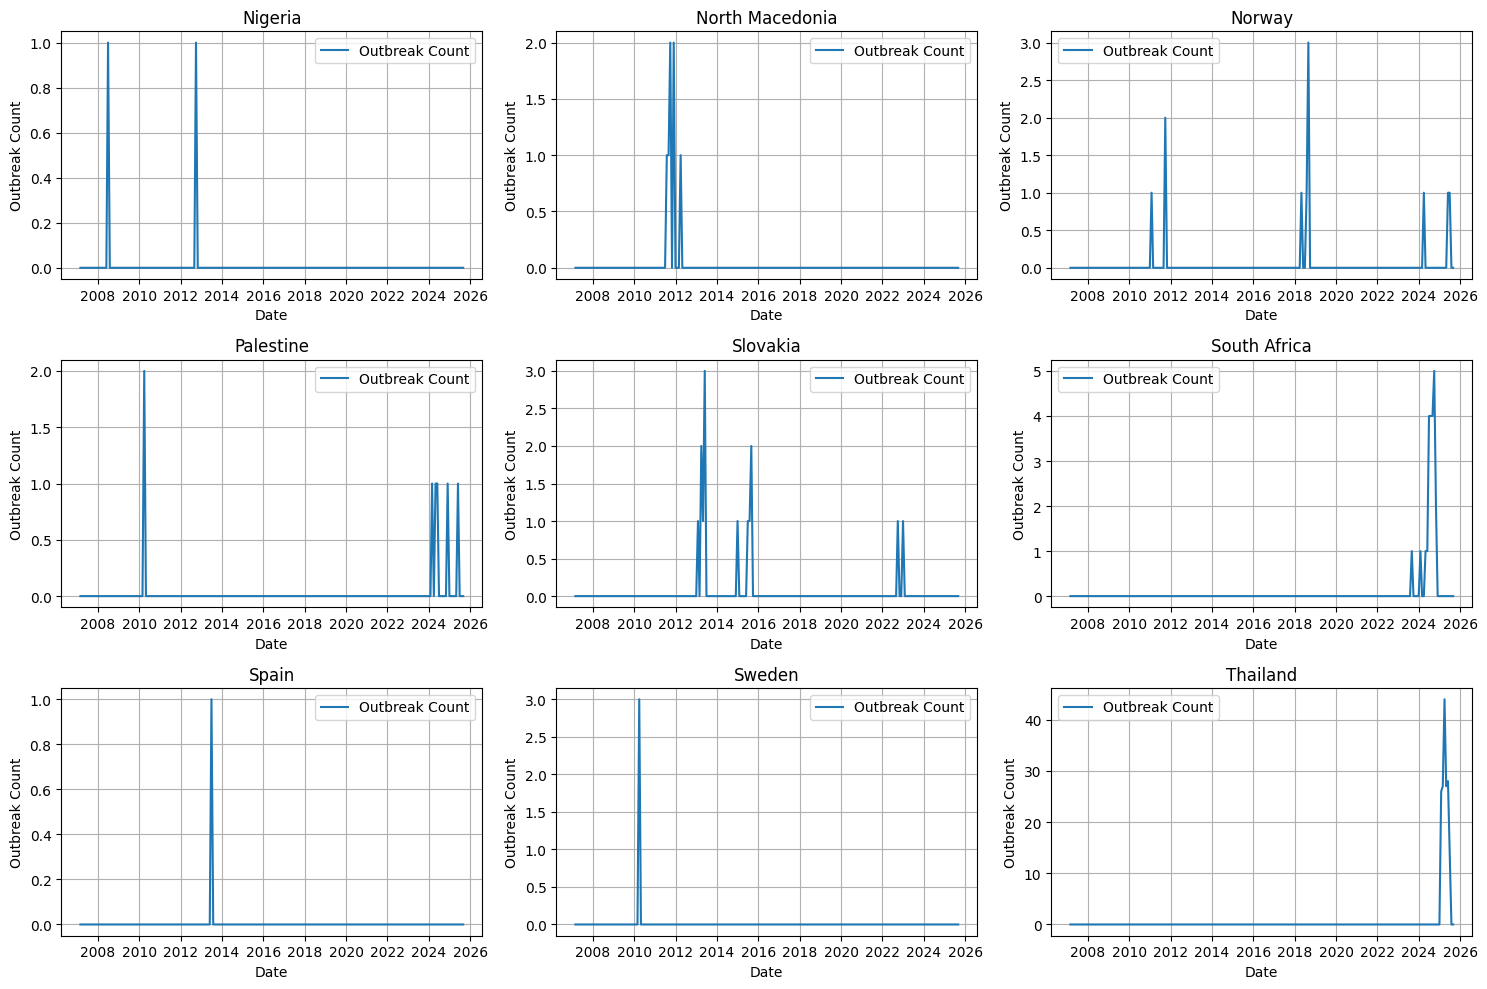

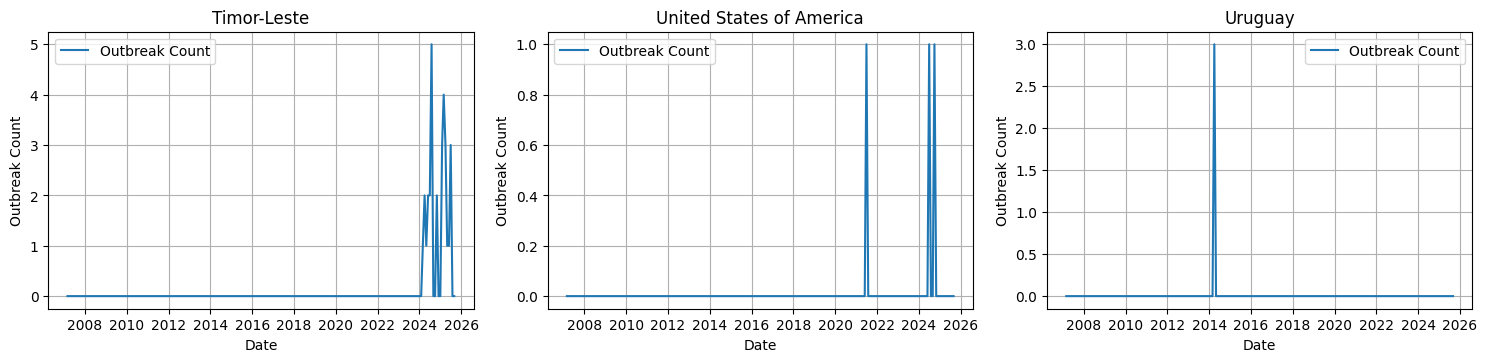

In [ ]:
import matplotlib.pyplot as plt

# Get the list of unique countries
countries = monthly_series['country'].unique()

# Plot outbreak trends for each country in subplots
n_cols = 3
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, country in enumerate(countries):
    # Create a new figure every 4 countries
    if i > 0 and i % (n_cols * n_rows) == 0:
        plt.tight_layout()
        plt.show()
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
        axes = axes.flatten()

    country_data = monthly_series[monthly_series['country'] == country]

    ax = axes[i % (n_cols * n_rows)] # Get the current subplot
    ax.plot(country_data['start_date'], country_data['outbreak_count'], label='Outbreak Count')
    ax.set_title(f'{country}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Outbreak Count')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i % (n_cols * n_rows) + 1, n_cols * n_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Total yearly outbreak counts for each country

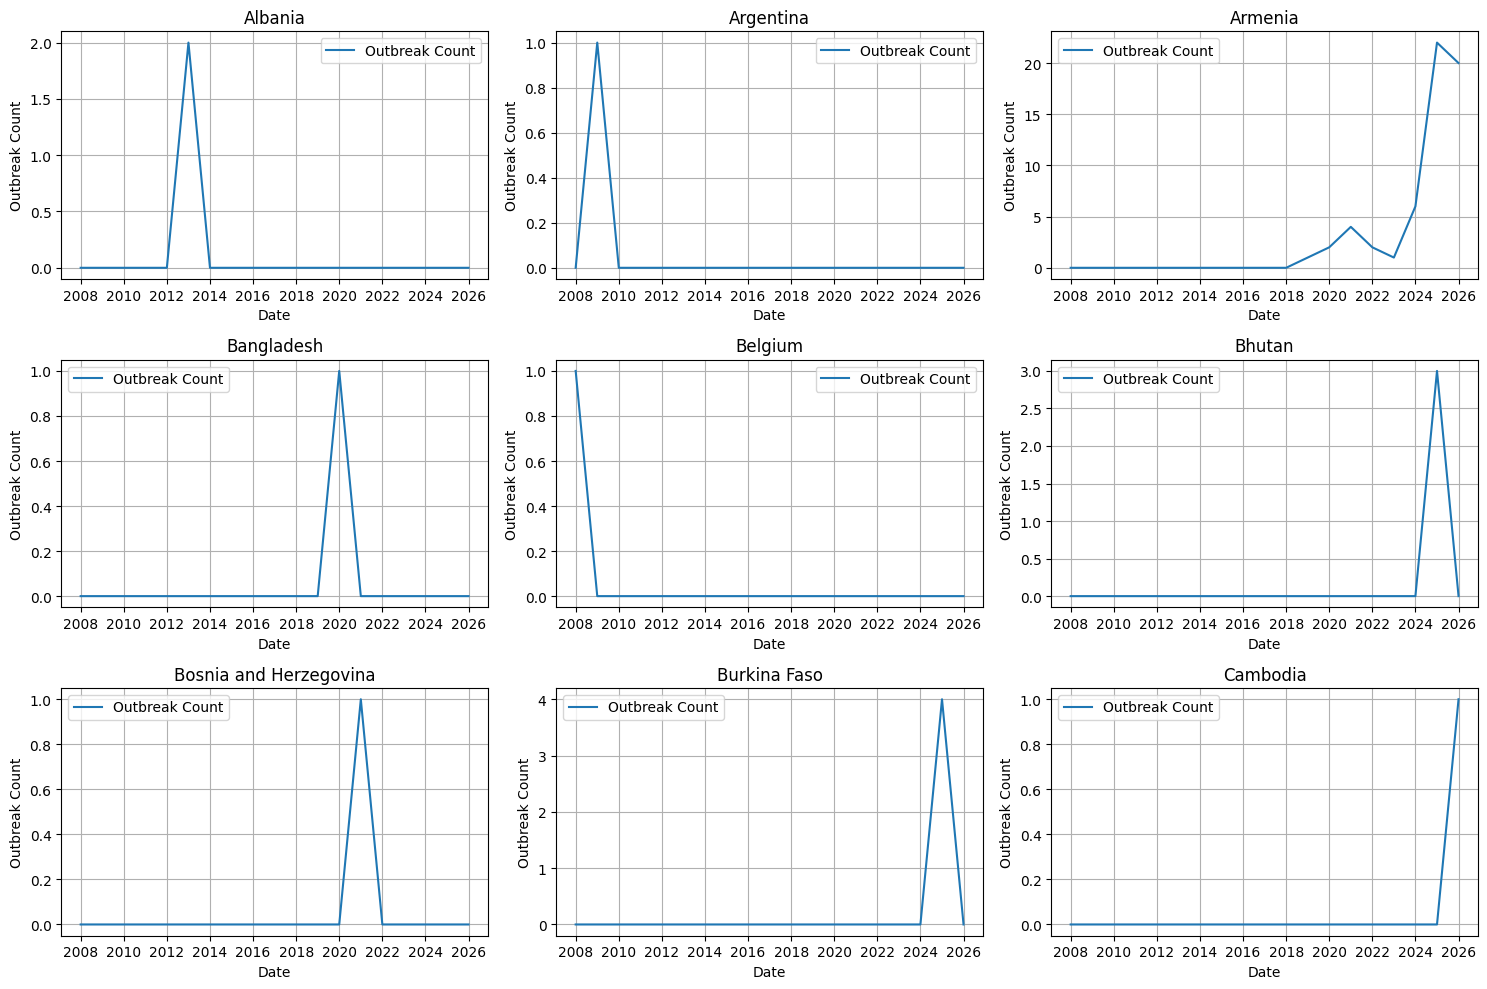

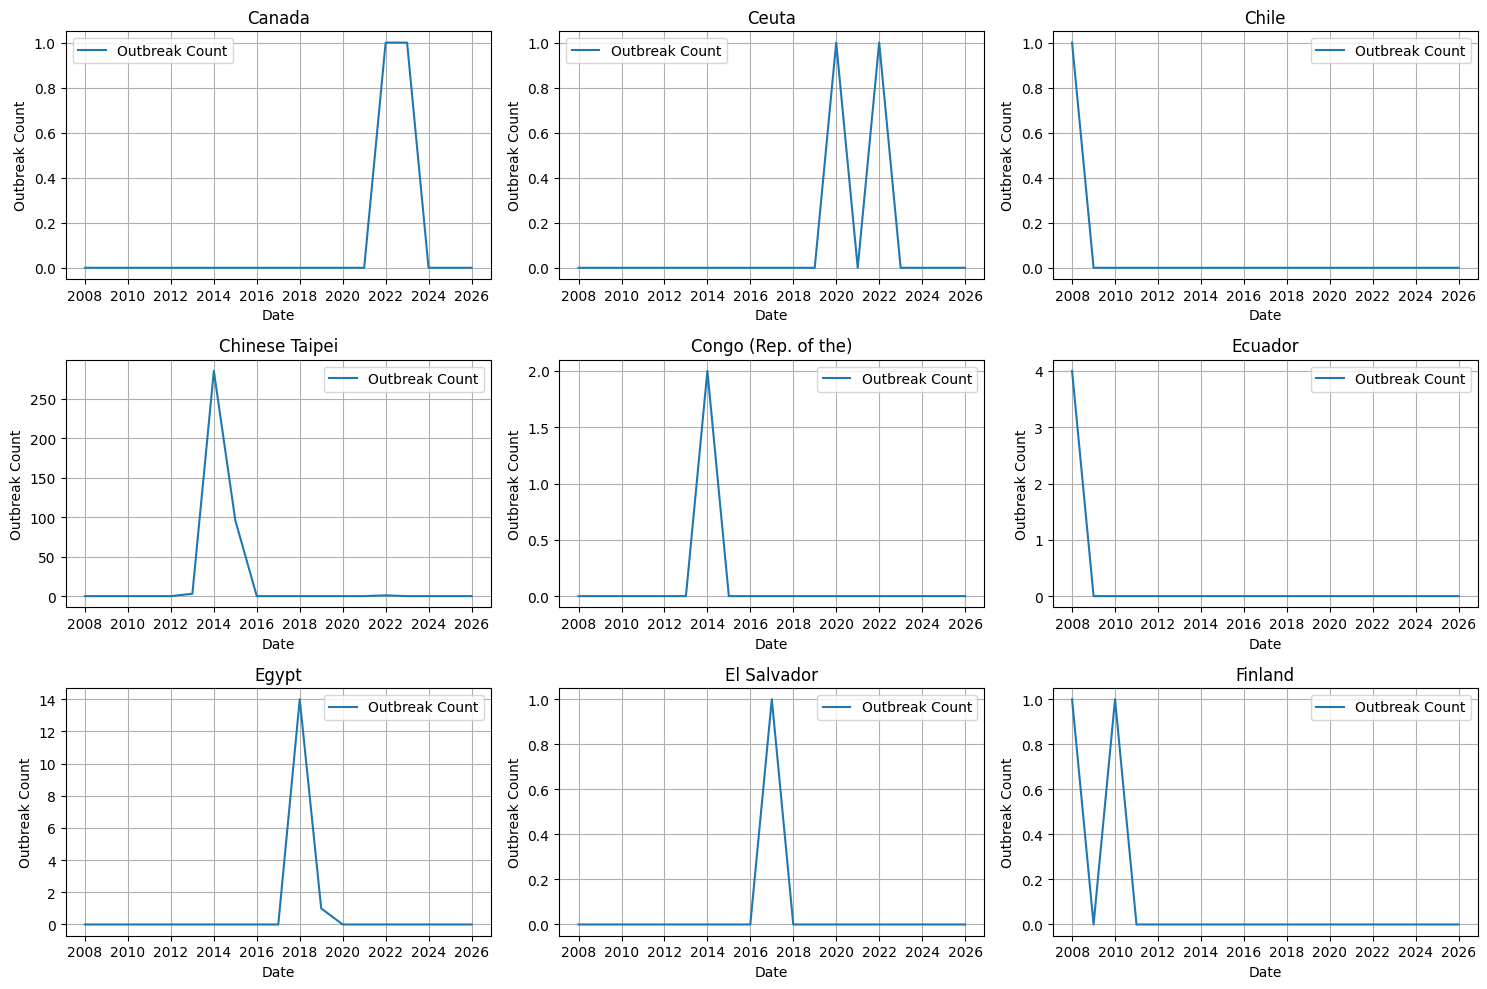

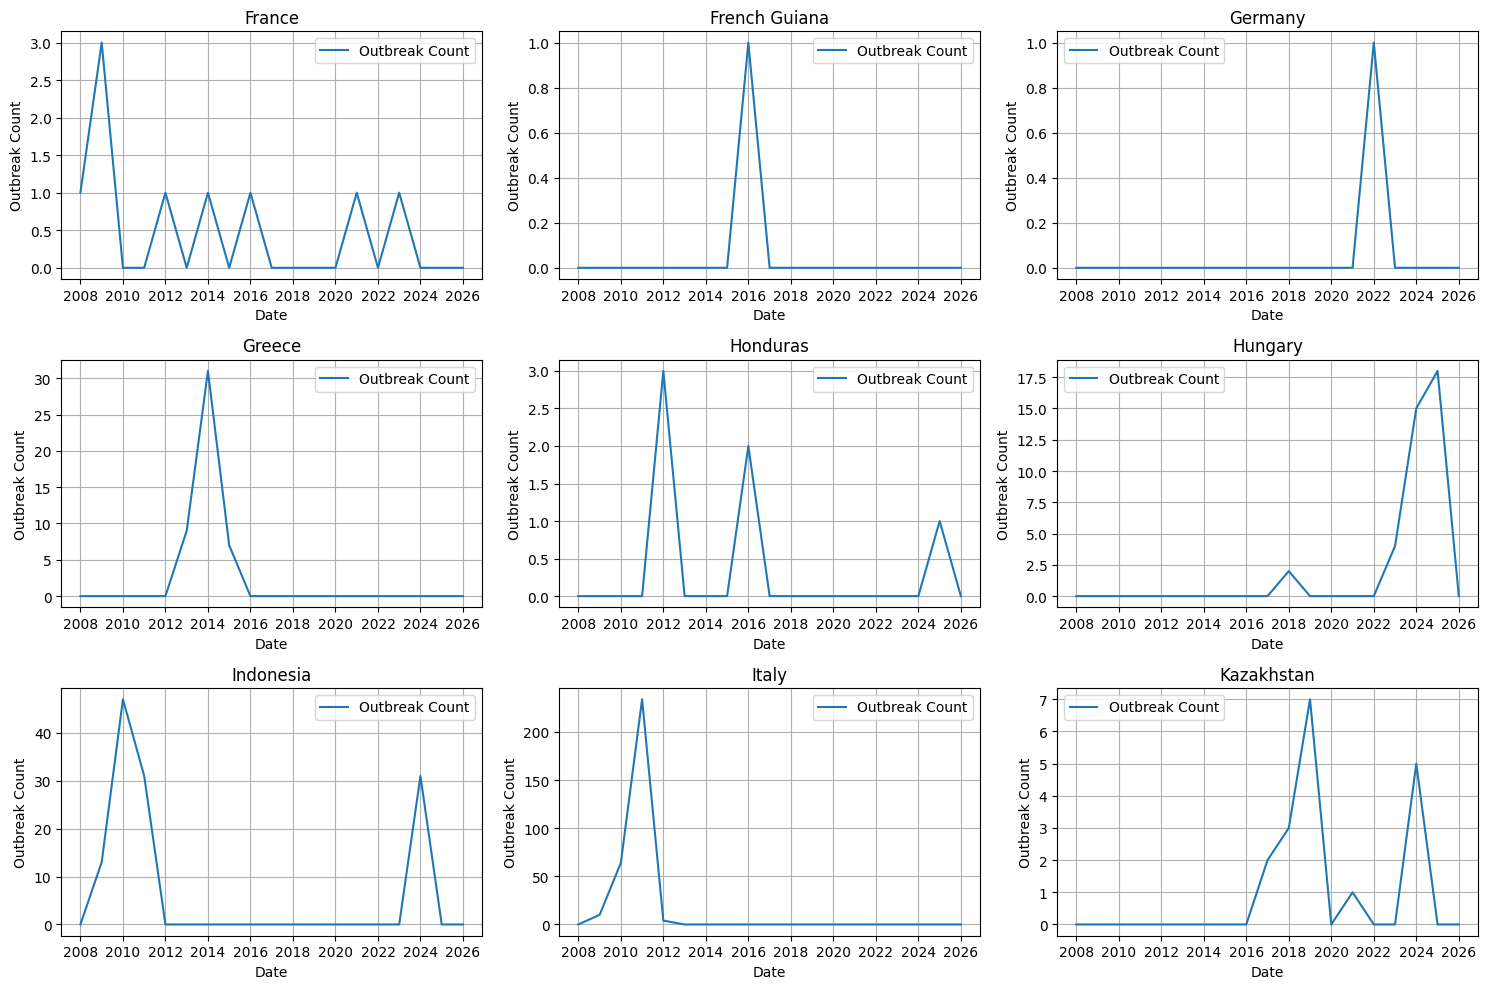

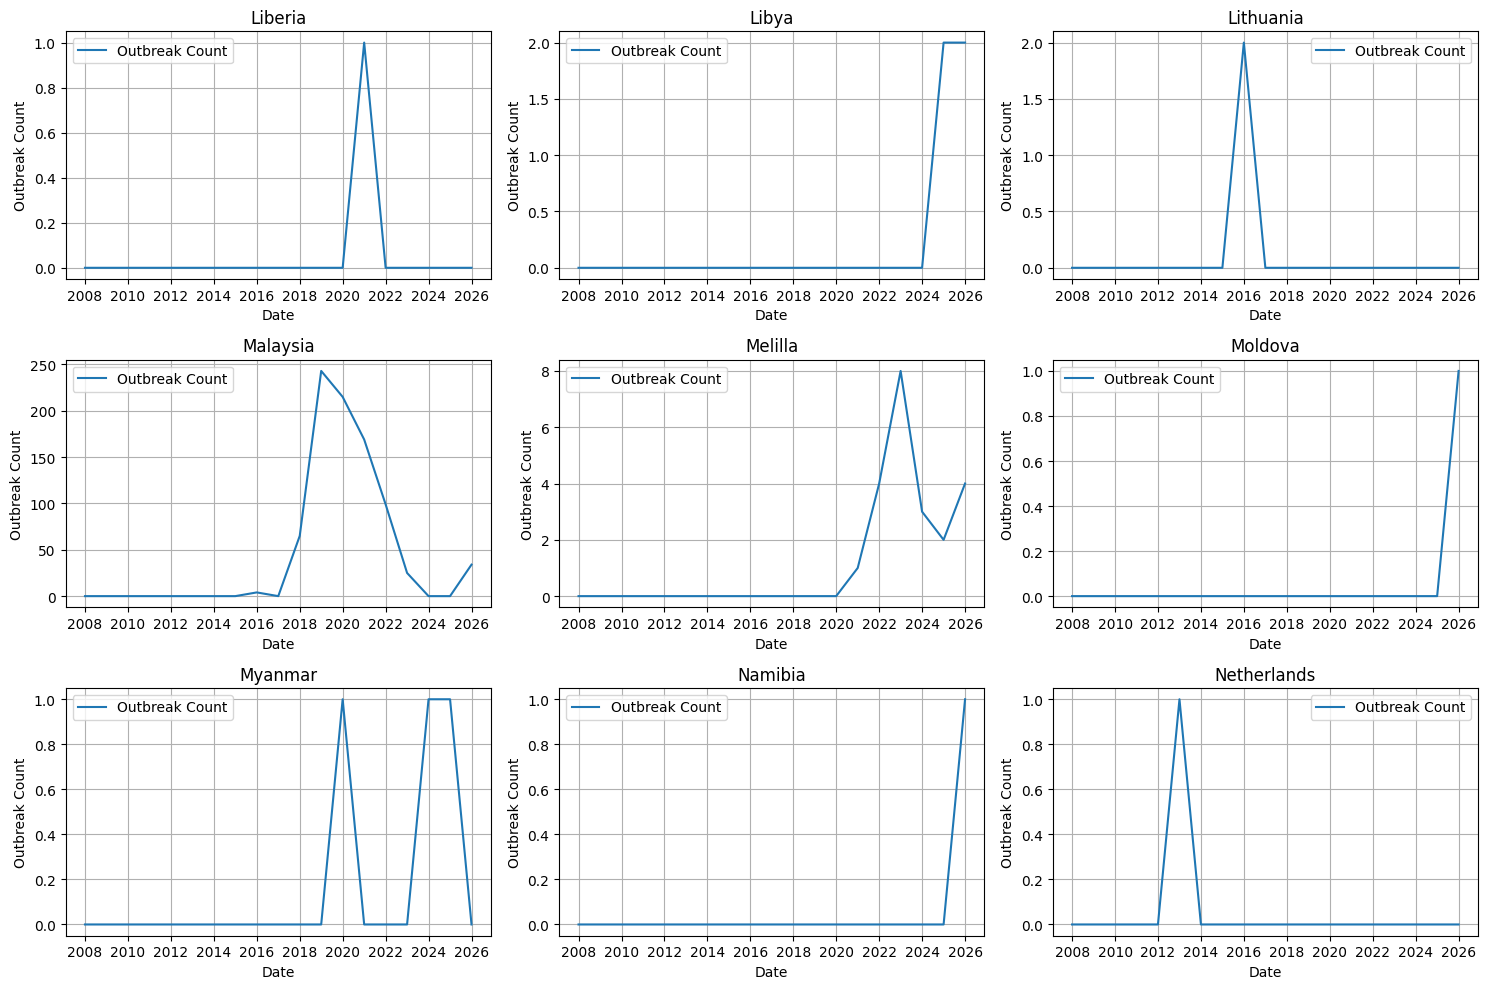

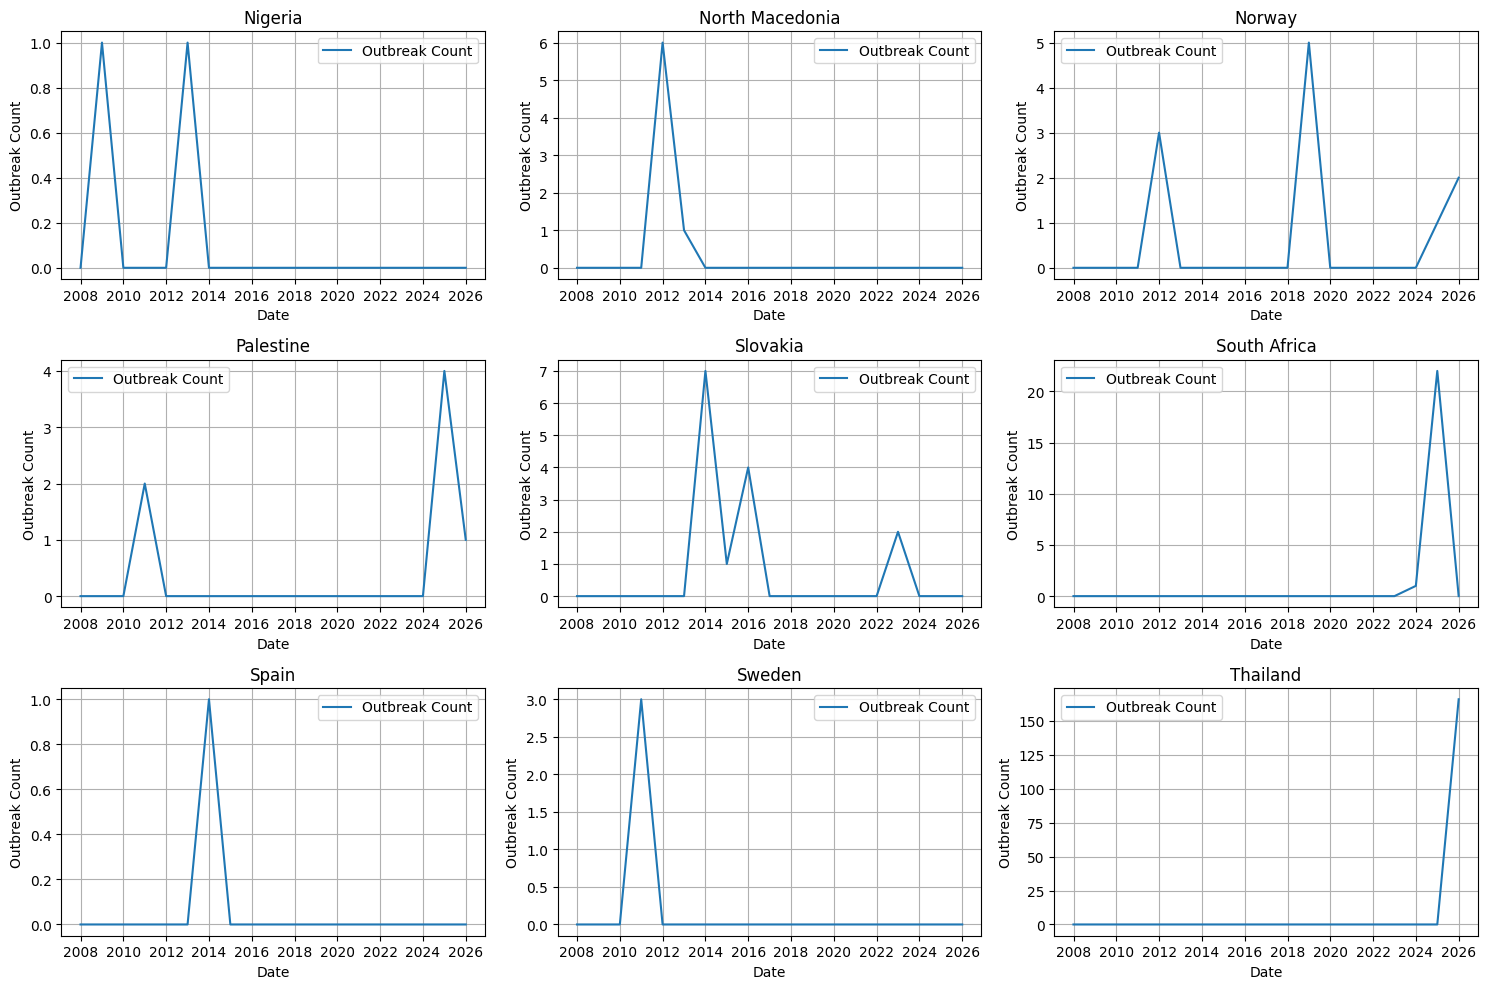

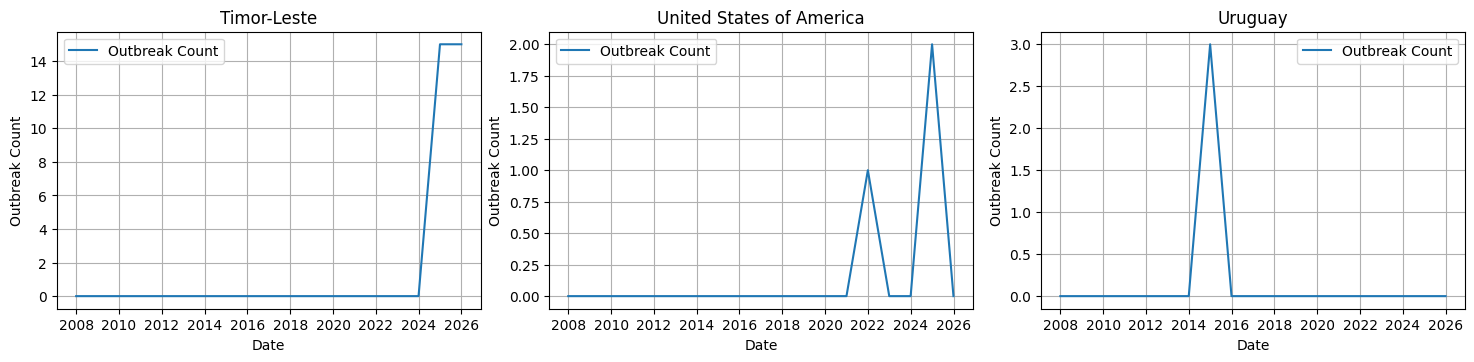

In [ ]:
import matplotlib.pyplot as plt

# Get the list of unique countries
countries = yearly_series['country'].unique()

# Plot outbreak trends for each country in subplots
n_cols = 3
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, country in enumerate(countries):
    # Create a new figure every 4 countries
    if i > 0 and i % (n_cols * n_rows) == 0:
        plt.tight_layout()
        plt.show()
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
        axes = axes.flatten()

    country_data = yearly_series[yearly_series['country'] == country]

    ax = axes[i % (n_cols * n_rows)] # Get the current subplot
    ax.plot(country_data['start_date'], country_data['outbreak_count'], label='Outbreak Count')
    ax.set_title(f'{country}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Outbreak Count')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i % (n_cols * n_rows) + 1, n_cols * n_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Total active oubtreaks for weekly, monthly and annualy

In [ ]:
week_active_outbreaks = weekly_series[weekly_series['outbreak_count'] > 0]
print(f"Total rows of active outbreaks for weekly: {len(week_active_outbreaks)}")
print(week_active_outbreaks.head().to_string(), '\n')

month_active_outbreaks = monthly_series[monthly_series['outbreak_count'] > 0]
print(f"Total rows of active outbreaks for monthly: {len(month_active_outbreaks)}")
print(month_active_outbreaks.head().to_string(), '\n')

year_active_outbreaks = yearly_series[yearly_series['outbreak_count'] > 0]
print(f"Total rows of active outbreaks for yearly: {len(year_active_outbreaks)}")
print(year_active_outbreaks.head().to_string())

Total rows of active outbreaks for weekly: 727
        country start_date  cases  deaths  duration   latitude  longitude  is_ongoing  country_code   end_date  outbreak_count  year  month  week_of_year
276     Albania 2012-06-10    0.0     0.0      37.0  41.983100  20.400000       False             0 2012-07-16             1.0  2012      6            23
290     Albania 2012-09-16    0.0     0.0      60.0  42.032900  20.221000       False             0 2012-11-09             1.0  2012      9            37
1054  Argentina 2008-11-16    1.0     1.0     213.0 -34.615200 -58.444400       False             1 2009-06-11             1.0  2008     11            46
2517    Armenia 2018-06-10    1.0     0.0       4.0  40.412900  44.680900       False             2 2018-06-08             1.0  2018      6            23
2559    Armenia 2019-03-31    1.0     1.0      24.0  40.151154  44.037595       False             2 2019-04-18             1.0  2019      3            13 

Total rows of active outbre

# Feature Engineering for Prediction

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

def enhanced_engineer_features(time_series, window_sizes=[4, 8, 12]):
    """Enhanced feature engineering for sparse outbreak data"""
    features = []
    grouped = time_series.groupby('country')

    # Initialize scalers
    outbreak_scaler = MinMaxScaler()
    cases_scaler = MinMaxScaler()

    for country, group in grouped:
        group = group.sort_values('start_date').copy()

        # Convert to numeric
        group['cases'] = pd.to_numeric(group['cases'], errors='coerce').fillna(0)
        group['deaths'] = pd.to_numeric(group['deaths'], errors='coerce').fillna(0)

        # 1. SCALING - Normalize outbreak count and cases
        group['outbreak_count_scaled'] = outbreak_scaler.fit_transform(
            group[['outbreak_count']].values.reshape(-1, 1)
        ).flatten()

        group['cases_scaled'] = cases_scaler.fit_transform(
            group[['cases']].values.reshape(-1, 1)
        ).flatten()

        # 2. LAGGED FEATURES (scaled version)
        for lag in [1, 2, 3, 4, 8, 12]:  # Extended lags for better pattern recognition
            group[f'outbreak_lag_{lag}'] = group['outbreak_count_scaled'].shift(lag)
            group[f'cases_lag_{lag}'] = group['cases_scaled'].shift(lag)

        # 3. ROLLING STATISTICS (multiple window sizes)
        for window in window_sizes:
            # Scaled rolling features
            group[f'outbreak_rolling_mean_{window}'] = (
                group['outbreak_count_scaled']
                .rolling(window=window, min_periods=1)
                .mean()
            )
            group[f'outbreak_rolling_max_{window}'] = (
                group['outbreak_count_scaled']
                .rolling(window=window, min_periods=1)
                .max()
            )
            group[f'outbreak_rolling_std_{window}'] = (
                group['outbreak_count_scaled']
                .rolling(window=window, min_periods=1)
                .std()
            ).fillna(0)

        # 4. TREND DETECTION FEATURES (crucial for sparse data)
        # Exponential moving averages for trend detection
        group['outbreak_ema_4'] = group['outbreak_count_scaled'].ewm(span=4).mean()
        group['outbreak_ema_8'] = group['outbreak_count_scaled'].ewm(span=8).mean()

        # Trend direction (1: increasing, -1: decreasing, 0: stable)
        group['outbreak_trend_4'] = np.sign(
            group['outbreak_count_scaled'] - group['outbreak_count_scaled'].shift(4)
        ).fillna(0)

        group['outbreak_trend_8'] = np.sign(
            group['outbreak_count_scaled'] - group['outbreak_count_scaled'].shift(8)
        ).fillna(0)

        # 5. OUTBREAK EVENT DETECTION
        # Binary indicator for any outbreak (helps with sparse data)
        group['outbreak_occurred'] = (group['outbreak_count'] > 0).astype(int)

        # Rolling outbreak occurrence probability
        for window in [4, 8, 12]:
            group[f'outbreak_prob_{window}'] = (
                group['outbreak_occurred']
                .rolling(window=window, min_periods=1)
                .mean()
            )

        # 6. TIME-BASED FEATURES (seasonality)
        group['month_sin'] = np.sin(2 * np.pi * group['month'] / 12)
        group['month_cos'] = np.cos(2 * np.pi * group['month'] / 12)
        group['week_sin'] = np.sin(2 * np.pi * group['week_of_year'] / 52)
        group['week_cos'] = np.cos(2 * np.pi * group['week_of_year'] / 52)

        # 7. COUNTRY-SPECIFIC BASELINE
        country_avg = group['outbreak_count_scaled'].mean()
        group['outbreak_deviation'] = group['outbreak_count_scaled'] - country_avg

        # 8. RECENCY WEIGHTING (recent outbreaks matter more)
        recency_weights = np.exp(-np.arange(len(group)) / 12)  # Exponential decay
        group['outbreak_recency_weighted'] = group['outbreak_count_scaled'] * recency_weights

        features.append(group)

    features_df = pd.concat(features)

    # Handle remaining NaN values
    numeric_cols = features_df.select_dtypes(include=[np.number]).columns
    features_df[numeric_cols] = features_df[numeric_cols].fillna(0)

    return features_df.dropna()

# Enhanced feature engineering
weekly_features = enhanced_engineer_features(weekly_series)
monthly_features = enhanced_engineer_features(monthly_series)
yearly_features = enhanced_engineer_features(yearly_series)

In [ ]:
# Save the dataframes to CSV files
weekly_features.to_csv('weekly_outbreak_features.csv', index=False)
monthly_features.to_csv('monthly_outbreak_features.csv', index=False)
yearly_features.to_csv('yearly_outbreak_features.csv', index=False)


In [ ]:
# View engineered features for a specific country
print(weekly_features[weekly_features['country'] == 'Malaysia'].head().to_string(),"\n")

# Check feature correlation with future outbreaks
print(weekly_features.corr(numeric_only=True)['outbreak_count'].sort_values())

        country start_date  cases  deaths  duration  latitude   longitude  is_ongoing  country_code   end_date  outbreak_count  year  month  week_of_year  outbreak_count_scaled  cases_scaled  outbreak_lag_1  cases_lag_1  outbreak_lag_2  cases_lag_2  outbreak_lag_3  cases_lag_3  outbreak_lag_4  cases_lag_4  outbreak_lag_8  cases_lag_8  outbreak_lag_12  cases_lag_12  outbreak_rolling_mean_4  outbreak_rolling_max_4  outbreak_rolling_std_4  outbreak_rolling_mean_8  outbreak_rolling_max_8  outbreak_rolling_std_8  outbreak_rolling_mean_12  outbreak_rolling_max_12  outbreak_rolling_std_12  outbreak_ema_4  outbreak_ema_8  outbreak_trend_4  outbreak_trend_8  outbreak_occurred  outbreak_prob_4  outbreak_prob_8  outbreak_prob_12  month_sin     month_cos  week_sin  week_cos  outbreak_deviation  outbreak_recency_weighted
28920  Malaysia 2007-02-25    0.0     0.0       0.0  1.850289  110.871233       False            30 2007-02-25             0.0  2007      2             8                    0.0    

In [ ]:
print(monthly_features[monthly_features['country'] == 'Malaysia'].head().to_string(),"\n")

# Check feature correlation with future outbreaks
print(monthly_features.corr(numeric_only=True)['outbreak_count'].sort_values())

       country start_date  cases  deaths  duration  latitude   longitude  is_ongoing  country_code   end_date  outbreak_count  year  month  week_of_year  outbreak_count_scaled  cases_scaled  outbreak_lag_1  cases_lag_1  outbreak_lag_2  cases_lag_2  outbreak_lag_3  cases_lag_3  outbreak_lag_4  cases_lag_4  outbreak_lag_8  cases_lag_8  outbreak_lag_12  cases_lag_12  outbreak_rolling_mean_4  outbreak_rolling_max_4  outbreak_rolling_std_4  outbreak_rolling_mean_8  outbreak_rolling_max_8  outbreak_rolling_std_8  outbreak_rolling_mean_12  outbreak_rolling_max_12  outbreak_rolling_std_12  outbreak_ema_4  outbreak_ema_8  outbreak_trend_4  outbreak_trend_8  outbreak_occurred  outbreak_prob_4  outbreak_prob_8  outbreak_prob_12     month_sin     month_cos      week_sin      week_cos  outbreak_deviation  outbreak_recency_weighted
6690  Malaysia 2007-02-28    0.0     0.0       0.0  1.862756  110.594605       False            30 2007-02-28             0.0  2007      2             9                  

In [ ]:
print(yearly_features[yearly_features['country'] == 'Malaysia'].head().to_string(),"\n")

# Check feature correlation with future outbreaks
print(yearly_features.corr(numeric_only=True)['outbreak_count'].sort_values())

      country start_date  cases  deaths  duration  latitude   longitude  is_ongoing  country_code   end_date  outbreak_count  year  month  week_of_year  outbreak_count_scaled  cases_scaled  outbreak_lag_1  cases_lag_1  outbreak_lag_2  cases_lag_2  outbreak_lag_3  cases_lag_3  outbreak_lag_4  cases_lag_4  outbreak_lag_8  cases_lag_8  outbreak_lag_12  cases_lag_12  outbreak_rolling_mean_4  outbreak_rolling_max_4  outbreak_rolling_std_4  outbreak_rolling_mean_8  outbreak_rolling_max_8  outbreak_rolling_std_8  outbreak_rolling_mean_12  outbreak_rolling_max_12  outbreak_rolling_std_12  outbreak_ema_4  outbreak_ema_8  outbreak_trend_4  outbreak_trend_8  outbreak_occurred  outbreak_prob_4  outbreak_prob_8  outbreak_prob_12     month_sin  month_cos      week_sin  week_cos  outbreak_deviation  outbreak_recency_weighted
570  Malaysia 2007-12-31    0.0     0.0       0.0  1.916192  108.988214       False            30 2007-12-31             0.0  2007     12             1                    0.0    

# View the average outbreak count for each contry

In [ ]:
# Calculate the average outbreak count for each country
average_outbreak_count = weekly_series.groupby('country')['outbreak_count'].mean().sort_values(ascending=False)

# Display the results
print("Average Weekly Outbreak Count per Country:")
print(average_outbreak_count)

Average Weekly Outbreak Count per Country:
country
Malaysia                    0.885892
Chinese Taipei              0.399378
Italy                       0.323651
Thailand                    0.172199
Indonesia                   0.126556
Armenia                     0.060166
Greece                      0.048755
Hungary                     0.040456
Timor-Leste                 0.031120
South Africa                0.023859
Melilla                     0.022822
Kazakhstan                  0.018672
Egypt                       0.015560
Slovakia                    0.014523
Norway                      0.011411
France                      0.009336
Palestine                   0.007261
North Macedonia             0.007261
Honduras                    0.006224
Libya                       0.004149
Burkina Faso                0.004149
Ecuador                     0.004149
United States of America    0.003112
Sweden                      0.003112
Uruguay                     0.003112
Myanmar                 

# Prepare LSTM Input Sequences

In [ ]:
from sklearn.preprocessing import LabelEncoder

def create_global_sequences(features_df, sequence_length=12, target_col='outbreak_count'):
    """Create global dataset with country embeddings for LSTM input"""

    # Encode countries into numeric IDs (for embeddings later)
    le = LabelEncoder()
    features_df['country_id'] = le.fit_transform(features_df['country'])

    # Features (exclude metadata + target)
    feature_cols = [col for col in features_df.columns
                   if col not in ['country', 'start_date', 'end_date', 'country_code', target_col]]

    X_all, y_all, country_ids = [], [], []

    for country in features_df['country'].unique():
        # Ensure sorted by month
        country_data = features_df[features_df['country'] == country].sort_values('start_date')

        # Extract feature values (including country_id!)
        country_features = country_data[feature_cols].values.astype('float32')
        cid = country_data['country_id'].iloc[0]  # same ID for this country

        # Build sliding window
        for i in range(len(country_data) - sequence_length):
            seq = country_features[i:i+sequence_length]  # X = 12 months
            target = country_data[target_col].iloc[i+sequence_length]  # next month

            X_all.append(seq)
            y_all.append(target)
            country_ids.append(cid)

    # Convert to arrays
    X_all = np.array(X_all, dtype='float32')   # (samples, timesteps, features)
    y_all = np.array(y_all, dtype='float32')   # (samples,)
    country_ids = np.array(country_ids, dtype='int32')  # (samples,)

    print(f"Global dataset: {X_all.shape}, {y_all.shape}, {country_ids.shape}")
    print("Countries encoded as:", dict(zip(le.classes_, le.transform(le.classes_))))

    return X_all, y_all, country_ids, le


# Example usage with sequence length 12 months
X_global, y_global, country_ids, le = create_global_sequences(
    monthly_features, sequence_length=12
)


Global dataset: (10085, 12, 47), (10085,), (10085,)
Countries encoded as: {'Albania': np.int64(0), 'Argentina': np.int64(1), 'Armenia': np.int64(2), 'Bangladesh': np.int64(3), 'Belgium': np.int64(4), 'Bhutan': np.int64(5), 'Bosnia and Herzegovina': np.int64(6), 'Burkina Faso': np.int64(7), 'Cambodia': np.int64(8), 'Canada': np.int64(9), 'Ceuta': np.int64(10), 'Chile': np.int64(11), 'Chinese Taipei': np.int64(12), 'Congo (Rep. of the)': np.int64(13), 'Ecuador': np.int64(14), 'Egypt': np.int64(15), 'El Salvador': np.int64(16), 'Finland': np.int64(17), 'France': np.int64(18), 'French Guiana': np.int64(19), 'Germany': np.int64(20), 'Greece': np.int64(21), 'Honduras': np.int64(22), 'Hungary': np.int64(23), 'Indonesia': np.int64(24), 'Italy': np.int64(25), 'Kazakhstan': np.int64(26), 'Liberia': np.int64(27), 'Libya': np.int64(28), 'Lithuania': np.int64(29), 'Malaysia': np.int64(30), 'Melilla': np.int64(31), 'Moldova': np.int64(32), 'Myanmar': np.int64(33), 'Namibia': np.int64(34), 'Netherlan

# Build the LSTM Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, LSTM, Dense, Dropout, BatchNormalization, Embedding, Flatten, Concatenate
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2

def build_outbreak_regression_model(sequence_length, n_features, n_countries, embedding_dim=16):
    """
    Build LSTM model with country embedding for outbreak count regression prediction.
    Args:
        sequence_length (int): Number of time steps in the input sequence
        n_features (int): Number of features per time step
        n_countries (int): Number of unique countries
        embedding_dim (int): Size of embedding vector for countries
    """
    # === Input 1: Time series data (X_global) ===
    time_input = Input(shape=(sequence_length, n_features), name="time_series_input")
    x = LSTM(128, return_sequences=True,
             kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(time_input)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = LSTM(64, return_sequences=False,
             kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # === Input 2: Country ID (categorical embedding) ===
    country_input = Input(shape=(1,), name="country_id_input")
    country_emb = Embedding(input_dim=n_countries, output_dim=embedding_dim)(country_input)
    country_emb = Flatten()(country_emb)  # shape: (embedding_dim,)

    # === Merge both inputs ===
    merged = Concatenate()([x, country_emb])

    # === Dense layers after merging ===
    merged = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(merged)
    merged = BatchNormalization()(merged)
    merged = Dropout(0.3)(merged)

    merged = Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(merged)
    merged = BatchNormalization()(merged)
    merged = Dropout(0.2)(merged)

    # === Output layer (Regression) ===
    output = Dense(1, activation='linear')(merged)

    # === Build Model ===
    model = Model(inputs=[time_input, country_input], outputs=output)

    # Compile
    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss=tf.keras.losses.Huber(),
        metrics=['mae', 'mse']
    )

    return model

# Train and Evaluate the Model

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import tensorflow as tf
import os

# ================================
# Build Global Dataset
# ================================
X_list, y_list, c_list = [], [], []

# Group monthly_features by country
grouped_monthly_features = monthly_features.groupby('country')

# Create a dictionary to store datasets for each country
monthly_datasets = {}
scalers = {}

# Prepare data for each country
for country, group in grouped_monthly_features:
    # Ensure sorted by date
    group = group.sort_values('start_date')

    # Define features and target
    feature_cols = [col for col in group.columns
                    if col not in ['country', 'start_date', 'end_date', 'country_code', 'outbreak_count']]
    X = group[feature_cols].values.astype('float32')
    y = group['outbreak_count'].values.astype('float32')

    # Create sequences for this country
    X_country, y_country = [], []
    sequence_length = 12 # Assuming a sequence length of 12 as used before
    for i in range(len(group) - sequence_length):
        X_country.append(X[i:i+sequence_length])
        y_country.append(y[i+sequence_length])

    if X_country: # Only add if sequences were created
        monthly_datasets[country] = (np.array(X_country), np.array(y_country))


# Now, build the global dataset from the monthly_datasets dictionary
country_to_id = {country: i for i, country in enumerate(monthly_datasets.keys())}

for country, (X, y) in monthly_datasets.items():
    country_idx = country_to_id[country]  # integer ID for embedding
    country_ids = np.full(shape=(len(X), 1), fill_value=country_idx, dtype=np.int32)

    X_list.append(X)
    y_list.append(y)
    c_list.append(country_ids)

# Merge into global arrays
X_global = np.vstack(X_list)   # shape: (samples, timesteps, features)
y_global = np.hstack(y_list)   # shape: (samples,)
country_ids_global = np.vstack(c_list)  # shape: (samples, 1)

print("X_global:", X_global.shape)
print("y_global:", y_global.shape)
print("country_ids_global:", country_ids_global.shape)

# ================================
# Train/Test Split (chronological not needed since mixing countries)
# ================================
X_train, X_test, y_train, y_test, c_train, c_test = train_test_split(
    X_global, y_global, country_ids_global,
    test_size=0.2, shuffle=True, random_state=42
)

# ================================
# Build Model
# ================================
sequence_length = X_global.shape[1]
n_features = X_global.shape[2]
n_countries = len(country_to_id)

model = build_outbreak_regression_model(
    sequence_length=sequence_length,
    n_features=n_features,
    n_countries=n_countries,
    embedding_dim=16
)

# ================================
# Callbacks
# ================================
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=8,
        min_lr=1e-6,
        verbose=1
    )
]

# ================================
# Train
# ================================
history = model.fit(
    [X_train, c_train], y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# ================================
# Evaluate
# ================================
test_loss, test_mae, test_mse = model.evaluate([X_test, c_test], y_test, verbose=0)
print(f"\nGlobal Model → MAE={test_mae:.3f}, RMSE={np.sqrt(test_mse):.3f}")

# ================================
# Predictions
# ================================
y_pred = model.predict([X_test, c_test])

# Save model
model_save_dir = 'saved_outbreak_models_global'
os.makedirs(model_save_dir, exist_ok=True)
model_path = os.path.join(model_save_dir, 'global_monthly_model.keras')
model.save(model_path)

print(f"\nGlobal model saved to '{model_path}'")

X_global: (10085, 12, 47)
y_global: (10085,)
country_ids_global: (10085, 1)
Epoch 1/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - loss: 0.6572 - mae: 0.9624 - mse: 4.3822 - val_loss: 0.1807 - val_mae: 0.1770 - val_mse: 3.3065 - learning_rate: 5.0000e-04
Epoch 2/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.3831 - mae: 0.6320 - mse: 4.3768 - val_loss: 0.1841 - val_mae: 0.3308 - val_mse: 3.2187 - learning_rate: 5.0000e-04
Epoch 3/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2574 - mae: 0.4491 - mse: 3.1453 - val_loss: 0.1528 - val_mae: 0.2055 - val_mse: 2.8467 - learning_rate: 5.0000e-04
Epoch 4/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.2379 - mae: 0.3960 - mse: 3.6803 - val_loss: 0.2115 - val_mae: 0.4469 - val_mse: 3.2734 - learning_rate: 5.0000e-04
Epoch 5/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.2288 - mae: 0.3742 - mse: 3.8649 - val_loss: 0.1839 - val_mae: 0.3408 - val_mse: 3.1646 - learning_rate: 5.0000e-04
Epoch 6/200
202/202 ━━━

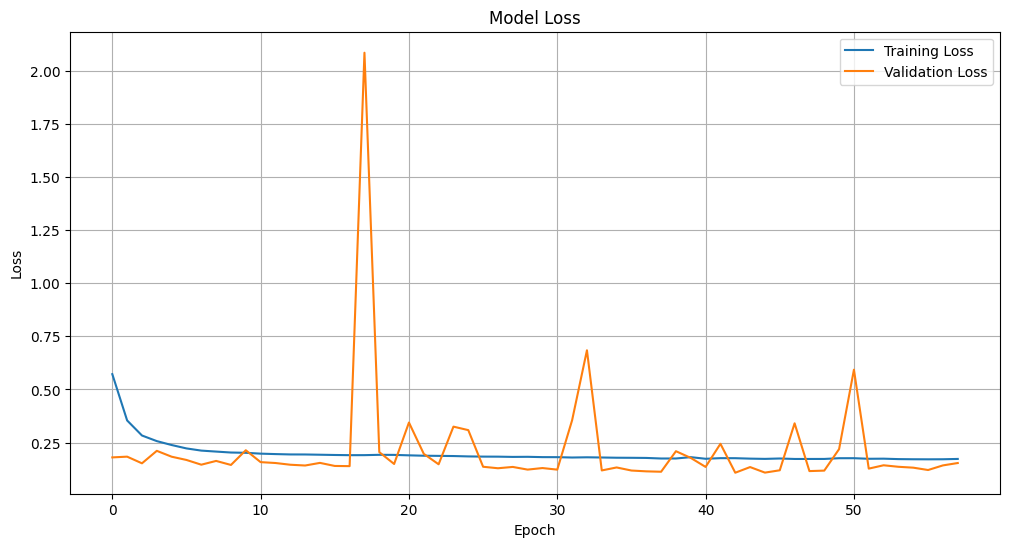

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Prediction Workflow

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def predict_future_outbreaks(model, country_features_df, country_name, sequence_length=12):
    """Predicts future outbreak count for a specific country using the global model"""

    # Get the latest data for the country
    country_data = country_features_df[country_features_df['country'] == country_name]
    country_data = country_data.sort_values('start_date')

    # Get the last 'sequence_length' data points
    latest_data = country_data.tail(sequence_length)

    if len(latest_data) < sequence_length:
        print(f"Warning: Not enough data for {country_name} to create a sequence of length {sequence_length}.")
        return None

    # Identify feature columns used during training (exclude metadata + target)
    feature_cols = [col for col in latest_data.columns
                   if col not in ['country', 'start_date', 'end_date', 'country_code', 'outbreak_count']]

    # Prepare the features (3D format: 1, timesteps, features)
    features = latest_data[feature_cols].values.astype('float32')
    features = features.reshape(1, sequence_length, -1)

    # Get the country ID for embedding
    country_idx = country_to_id[country_name]
    country_id_input = np.array([[country_idx]])  # shape (1, 1)

    # Make prediction (scaled)
    predicted_scaled_outbreak_count = model.predict([features, country_id_input])[0][0]

    # Inverse scale the prediction
    outbreak_scaler = MinMaxScaler()
    historical_outbreak_data = country_data[['outbreak_count']].values.astype('float32')
    outbreak_scaler.fit(historical_outbreak_data)

    predicted_outbreak_count = outbreak_scaler.inverse_transform([[predicted_scaled_outbreak_count]])[0][0]

    return predicted_outbreak_count


# Example usage: predict for Malaysia
predicted_monthly_outbreaks_malaysia = predict_future_outbreaks(
    model, monthly_features, 'Malaysia', sequence_length=12
)

if predicted_monthly_outbreaks_malaysia is not None:
    print(f"\nPredicted monthly outbreak count for Malaysia in the next period: {predicted_monthly_outbreaks_malaysia:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step

Predicted monthly outbreak count for Malaysia in the next period: 6.66


/tmp/ipython-input-2536935123.py:76: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prediction_dates = pd.date_range(start=last_date, periods=steps+1, freq='M')[1:]


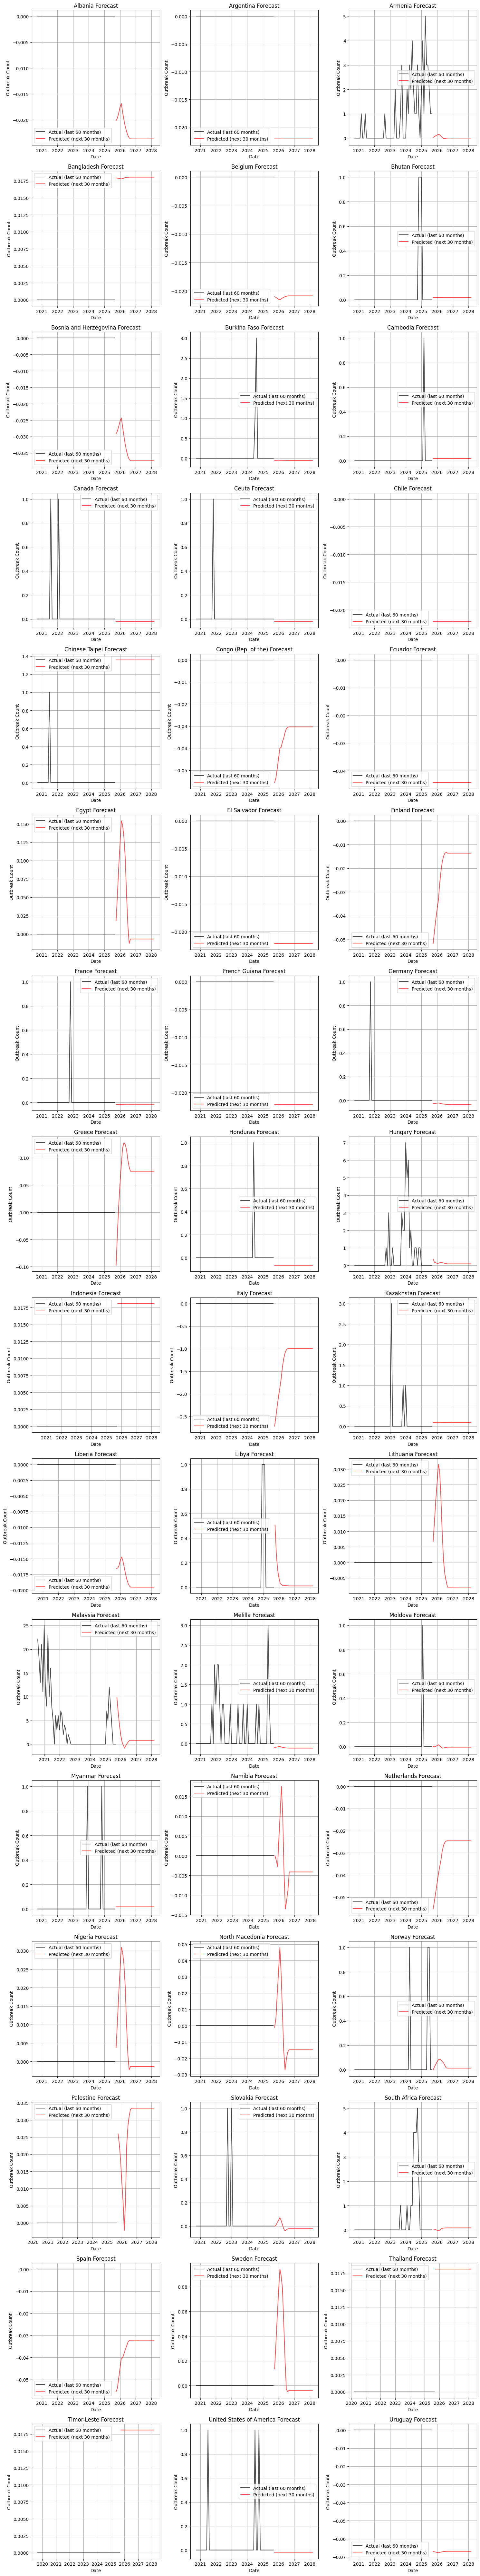

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Function to predict next N months for each country (with inverse scaling)
def predict_next_month(model, monthly_datasets, monthly_features, country_to_id, sequence_length=12, steps=30):
    predictions = {}

    for country, (X_country, y_country) in monthly_datasets.items():
        # Use the last 'sequence_length' as the seed sequence
        last_seq = X_country[-1].reshape(1, sequence_length, -1)  # Shape (1, seq_len, n_features)
        preds_scaled = []
        current_seq = last_seq.copy()

        for _ in range(steps):
            country_id = np.array([[country_to_id[country]]])  # embedding input

            # Predict next outbreak (scaled)
            pred_scaled = model.predict([current_seq, country_id], verbose=0)

            # Update the sliding window with prediction
            new_row = current_seq[0, -1, :].copy()
            feature_cols = [col for col in monthly_features.columns
                            if col not in ['country', 'start_date', 'end_date', 'country_code', 'outbreak_count']]

            try:
                outbreak_scaled_index = feature_cols.index('outbreak_count_scaled')
                new_row[outbreak_scaled_index] = pred_scaled[0, 0]
            except ValueError:
                print(f"⚠️ outbreak_count_scaled not found in features for {country}")
                pass

            # Roll sequence
            new_row = new_row.reshape(1, 1, -1)
            current_seq = np.concatenate([current_seq[:, 1:, :], new_row], axis=1)

            preds_scaled.append(pred_scaled[0, 0])

        # ---- Inverse scale predictions ----
        # Fit scaler on outbreak_count history of this country
        scaler = MinMaxScaler()
        historical_outbreak = monthly_features.loc[monthly_features['country'] == country, ['outbreak_count']].values
        scaler.fit(historical_outbreak)

        preds_inverse = scaler.inverse_transform(np.array(preds_scaled).reshape(-1, 1)).flatten()
        predictions[country] = preds_inverse

    return predictions


# Generate predictions (inverse-transformed to actual outbreak counts)
steps = 30
future_preds = predict_next_month(model, monthly_datasets, monthly_features, country_to_id,
                                  sequence_length=12, steps=steps)

# ---- Visualization ----
n_cols = 3
n_rows = (len(future_preds) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

last_dates = monthly_features.groupby('country')['start_date'].max()

for i, (country, preds) in enumerate(future_preds.items()):
    ax = axes[i]
    country_data = monthly_features[monthly_features['country'] == country].sort_values('start_date')

    # Plot last 60 months of actual data
    plot_history_months = 60
    actual_data_subset = country_data.tail(plot_history_months)

    # Create forecast timeline
    last_date = last_dates[country]
    prediction_dates = pd.date_range(start=last_date, periods=steps+1, freq='M')[1:]

    # Plot actual vs forecast (both on the same scale now!)
    ax.plot(actual_data_subset['start_date'], actual_data_subset['outbreak_count'],
            label='Actual (last 60 months)', alpha=0.7, color='black')
    ax.plot(prediction_dates, preds, label='Predicted (next 30 months)', alpha=0.7, color='red')

    ax.set_title(f'{country} Forecast')
    ax.set_xlabel('Date')
    ax.set_ylabel('Outbreak Count')
    ax.legend()
    ax.grid(True)

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


NameError: name 'scalers' is not defined

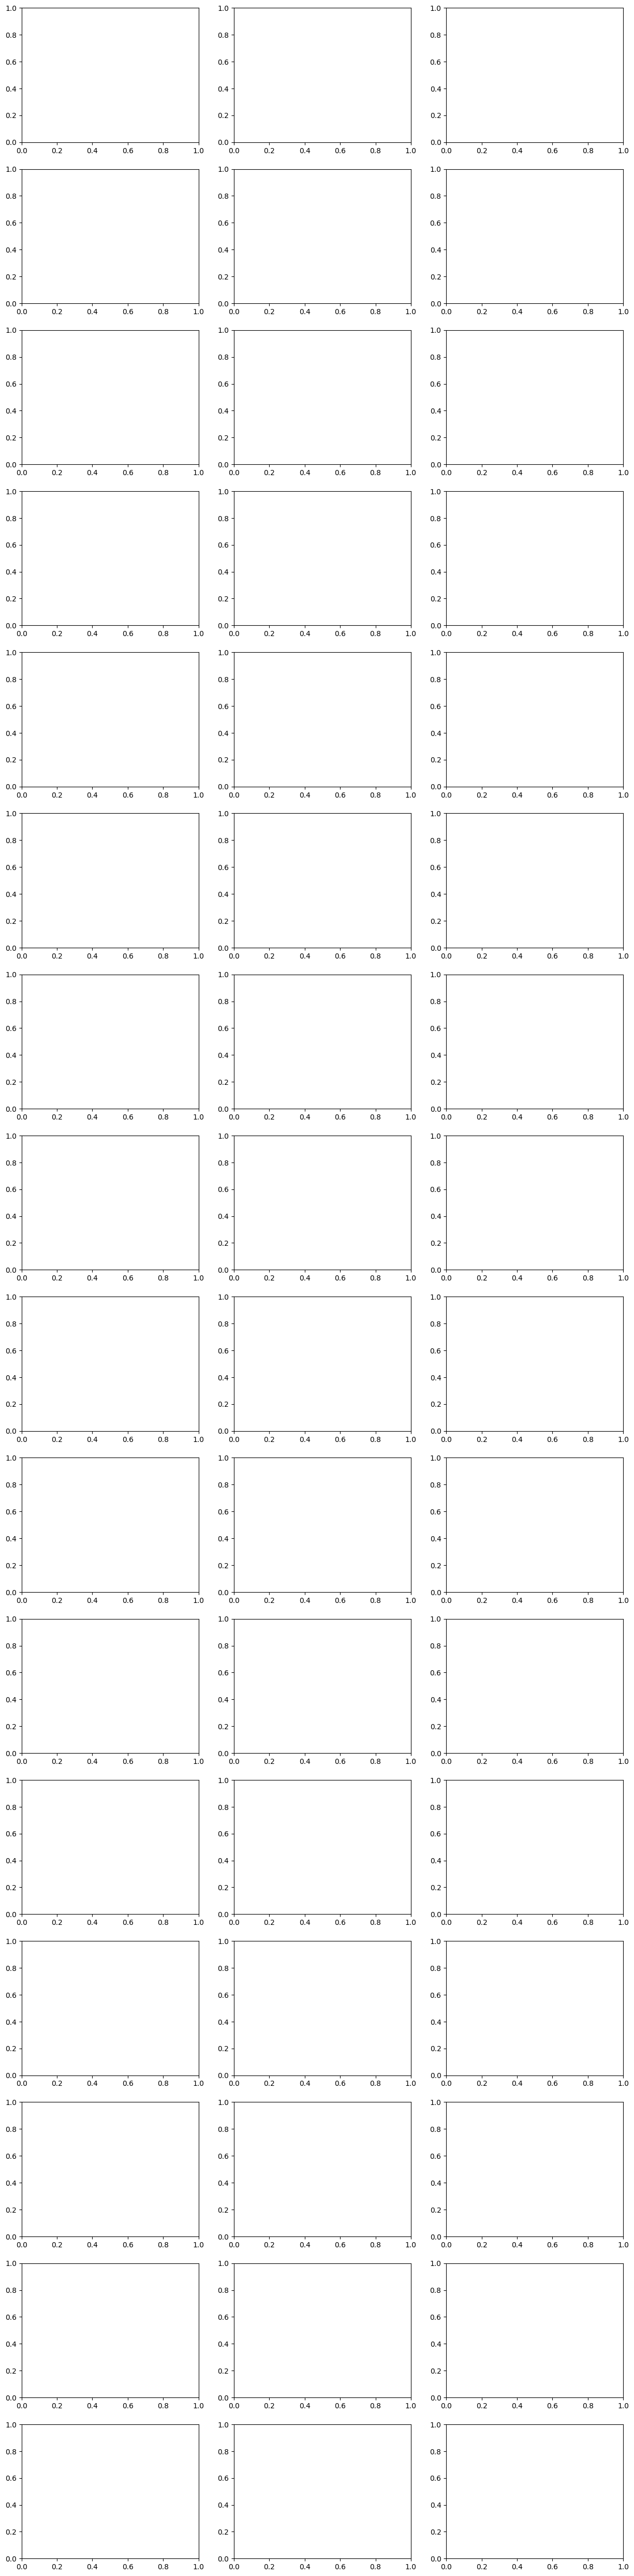

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np

# test_results = {country: y_test_values}
# predictions = {country: y_pred_values}

# Get the actual values from monthly_datasets
actual_results = {}
for country, (X_country, y_country) in monthly_datasets.items():
    actual_results[country] = y_country

countries = list(actual_results.keys())
n_countries = len(countries)

# Number of subplots: 3 per row
cols = 3
rows = math.ceil(n_countries / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()  # Convert to 1D array

for i, country in enumerate(countries):
    y_test = actual_results[country]

    # Use the predictions (still scaled)
    y_pred_scaled = future_preds.get(country, [])

    if len(y_pred_scaled) > 0:
        # Reshape before inverse transform
        y_pred_scaled = np.array(y_pred_scaled).reshape(-1, 1)

        # Inverse transform using the scaler for this country
        y_pred = scalers[country].inverse_transform(y_pred_scaled).flatten()

        # Also inverse transform actual values for plotting
        y_test_unscaled = scalers[country].inverse_transform(
            np.array(y_test).reshape(-1, 1)
        ).flatten()

        axes[i].plot(y_test_unscaled, label="Actual", alpha=0.7, color="black")
        axes[i].plot(y_pred, label="Predicted", alpha=0.7, color="red")
    else:
        axes[i].plot(y_test, label="Actual", alpha=0.7, color="black")

    axes[i].set_title(f"{country} - Outbreak Prediction")
    axes[i].set_xlabel("Time Step (months)")
    axes[i].set_ylabel("Outbreak Count")
    axes[i].legend()
    axes[i].grid(True)

# Remove empty axes (if countries < rows*cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
